# Credit EDA Case Study

## 1. Importing all the necessary libraries

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

#Setting value of display.max_rows to None to display all rows in the dataframe
pd.set_option('display.max_rows', None)
#Setting value of display.max_columns to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## 2. Data cleaning

### Reading the dataset

In [3]:
#reading the data set of "application_data" in app_data.
#reading the data set of "previous_application" in prev_app.

app_data = pd.read_csv('application_data.csv')
prev_app = pd.read_csv('previous_application.csv')

In [4]:
#Printing the head of the data frame "app_data"
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
#Printing the head of the data frame "prev_app"
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Determining the shape of dataframe app_data
app_data.shape

(307511, 122)

In [7]:
#print the information of variables to check their data types
app_data.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
# Categorical columns
list(set(app_data.columns) - set(app_data.describe().columns))

['NAME_CONTRACT_TYPE',
 'EMERGENCYSTATE_MODE',
 'NAME_TYPE_SUITE',
 'CODE_GENDER',
 'OCCUPATION_TYPE',
 'FLAG_OWN_CAR',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_INCOME_TYPE',
 'ORGANIZATION_TYPE',
 'WALLSMATERIAL_MODE',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_OWN_REALTY',
 'HOUSETYPE_MODE',
 'FONDKAPREMONT_MODE']

In [9]:
# Numerical columns
app_data.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

### Checking data quality
#### Dealing with missing values

In [10]:
# Checking for null values
app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [11]:
#calculating the percentage of missing values in each column.
null_values = app_data.isnull().sum()/len(app_data)*100
null_values

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [12]:
#Columns with high missing percentage (>=45%)
missing_vals = null_values[null_values>=45]
missing_vals

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [13]:
len(missing_vals)

49

#### Here, we observe that there are 49 columns having a large number of missing values (>=45%). We will drop these columns with high percentage of missing values which are not for our analysis purpose while the remaining variables with missing values will be considered and treated accordingly.

In [14]:
#removing 41 columns having null percentage more than 45%.
app_data = app_data.drop(missing_vals.index, axis =1)
app_data.shape

(307511, 73)

In [15]:
#listing rest of the columns with missing values
null_values = app_data.isnull().sum()/len(app_data)*100
all_null = null_values[null_values>0]
all_null

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

- We notice that there are still quite a number rows with missing values, however, with less percentage of values missing. We are narrowed down here with two choices on how to deal with such columns. We can decide to retain such columns and impute data inplace of missing values with mean/median/mode depending on certain conditions or simply delete such columns. 

However, it is important to note that deleting some of these columns might result in loss of data and thus we have to be cautious not to remove columns that are necessary for our analysis. On the other hand, imputing data can cause bias and therefore, sometimes it is better to let the null values be and continue with the analysis.

In [16]:
#identifying columns with less missing missing values (<15%)
null_15 = all_null[all_null<15]
null_15.sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

In [17]:
#understanding datatypes of these columns
app_data[null_15.index].dtypes

AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
CNT_FAM_MEMBERS               float64
EXT_SOURCE_2                  float64
OBS_30_CNT_SOCIAL_CIRCLE      float64
DEF_30_CNT_SOCIAL_CIRCLE      float64
OBS_60_CNT_SOCIAL_CIRCLE      float64
DEF_60_CNT_SOCIAL_CIRCLE      float64
DAYS_LAST_PHONE_CHANGE        float64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: object

- We observe that columns like 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS' and 'DAYS_LAST_PHONE_CHANGE' have very less number of missing values and they contain numeric data and thus, we can either remove them looking at the standard deviation or impute them with mean/median depending on the presence of any outliers. We can check the presence of outliers, by comparing its mean and median values or using boxplot and finding the difference between 95th and 99th percentile and comparing it with the max value.

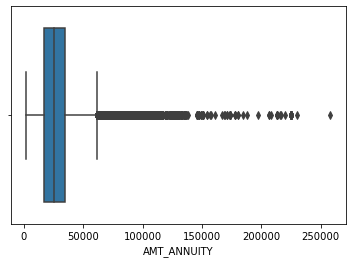

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64


In [18]:
# Analyzing AMT_ANNUITY column
sns.boxplot(app_data['AMT_ANNUITY'])
plt.show()
print(app_data['AMT_ANNUITY'].describe())
print(app_data['AMT_ANNUITY'].quantile([0.9,0.95,0.99]))

- We can clearly conclude the presence of outliers from the above boxplot and the significant difference between the 95th/99th percentile from the max value. Since the standard deviation is large, the rows corresponding columns with null values could be dropped or imputed with median.

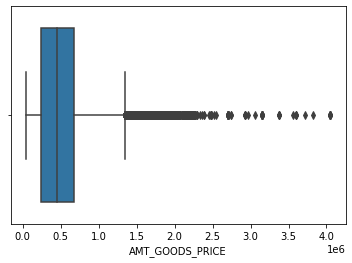

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
0.90    1093500.0
0.95    1305000.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64


In [19]:
# Analyzing AMT_GOODS_PRICE column
sns.boxplot(app_data['AMT_GOODS_PRICE'])
plt.show()
print(app_data['AMT_GOODS_PRICE'].describe())
print(app_data['AMT_GOODS_PRICE'].quantile([0.9,0.95,0.99]))

- We can clearly conclude the presence of outliers from the above boxplot and the significant difference between the 95th/99th percentile from the max value. Since the standard deviation is large, the rows corresponding columns with null values could be dropped or imputed with median.

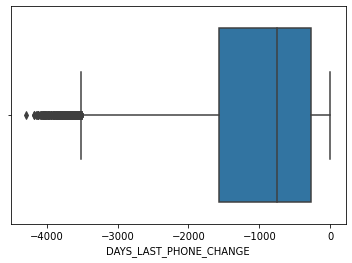

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64
0.90    0.0
0.95    0.0
0.99    0.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


In [20]:
# Analyzing DAYS_LAST_PHONE_CHANGE column
sns.boxplot(app_data['DAYS_LAST_PHONE_CHANGE'])
plt.show()
print(app_data['DAYS_LAST_PHONE_CHANGE'].describe())
print(app_data['DAYS_LAST_PHONE_CHANGE'].quantile([0.9,0.95,0.99]))

- We observe after analyzing the above data that since the standard deviation is high and there is only one null value present, it is not suitable to impute it with median andthe row corresponding to this null value could be dropped.

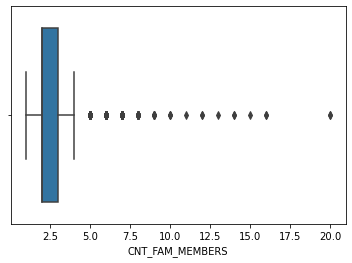

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64
0.90    3.0
0.95    4.0
0.99    5.0
Name: CNT_FAM_MEMBERS, dtype: float64


In [21]:
# Analyzing CNT_FAM_MEMBERS column
sns.boxplot(app_data['CNT_FAM_MEMBERS'])
plt.show()
print(app_data['CNT_FAM_MEMBERS'].describe())
print(app_data['CNT_FAM_MEMBERS'].quantile([0.9,0.95,0.99]))

- We can conclude the presence of outliers from the above boxplot and the large difference between 99th percentile and max value, with no such standard deviation, therefore the null values could be replaced with median in this case.

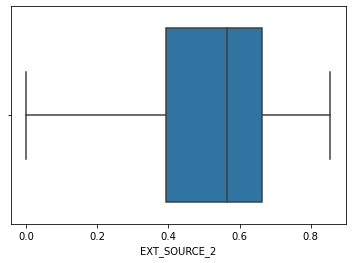

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64
0.90    0.722047
0.95    0.747734
0.99    0.782793
Name: EXT_SOURCE_2, dtype: float64


In [22]:
# Analyzing EXT_SOURCE_2 column
sns.boxplot(app_data['EXT_SOURCE_2'])
plt.show()
print(app_data['EXT_SOURCE_2'].describe())
print(app_data['EXT_SOURCE_2'].quantile([0.9,0.95,0.99]))

- We can observe from the above that there are no outliers and therefore the null values could be imputed with the mean value.

In [23]:
# Analyzing NAME_TYPE_SUITE column
print(app_data['NAME_TYPE_SUITE'].value_counts())
print(app_data['NAME_TYPE_SUITE'].describe())
print(app_data['NAME_TYPE_SUITE'].mode())

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object
0    Unaccompanied
dtype: object


- We can observe that 'NAME_TYPE_SUITE' is a categorical variable and so the missing values in it can be imputed with the most popular category (mode value) which is "Unaccompanied"

In [24]:
#Dropping a few more columns which may not be important from the point of view our analysis
app_data.drop(['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'], axis = 1, inplace = True)

In [25]:
#Checking the shape of the updated Dataset
app_data.shape

(307511, 49)

In [26]:
#checking the number of rows which are more than 50% columns having missing value
len(app_data[app_data.isnull().sum(axis = 1) > len(app_data.columns) //2].index)

0

In [27]:
#checking the dataframe for any duplicate rows
print(app_data.duplicated(subset=None).sum())

0


In [28]:
#Analyzing column CODE_GENDER for XNA value
print(app_data['CODE_GENDER'].value_counts())
print(app_data['CODE_GENDER'].mode())

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
0    F
dtype: object


In [29]:
#Replacing XNA value with NaN
app_data.CODE_GENDER.replace('XNA',np.NaN, inplace=True)
app_data.CODE_GENDER.describe()

count     307507
unique         2
top            F
freq      202448
Name: CODE_GENDER, dtype: object

In [30]:
# Changing '-ve' values into '+ve' Values
app_data['DAYS_BIRTH'] = app_data['DAYS_BIRTH'].abs()
app_data['DAYS_EMPLOYED'] = app_data['DAYS_EMPLOYED'].abs()
app_data['DAYS_REGISTRATION'] = app_data['DAYS_REGISTRATION'].abs()
app_data['DAYS_ID_PUBLISH'] = app_data['DAYS_ID_PUBLISH'].abs()
app_data['DAYS_LAST_PHONE_CHANGE'] = app_data['DAYS_LAST_PHONE_CHANGE'].abs()

#### Handling Outliers
- Imputation
- Deletion of outliers
- Binning of values
- Capping the outlier

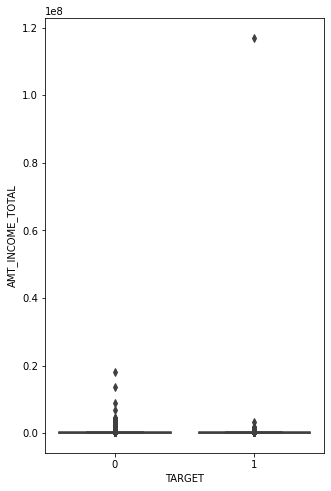

In [31]:
# BoxPlot for AMT_INCOME_TOTAL
plt.figure(figsize = [5,8])
sns.boxplot(data=app_data, x="TARGET", y="AMT_INCOME_TOTAL")
plt.show()

- We can observe that there are many outliers present and with AMT_INCOME_TOTAL being a continuous variable, we can bin its values instead of imputing them with mean/median. There is one extreme outlier in TARGET = 1 which can also be dropped.

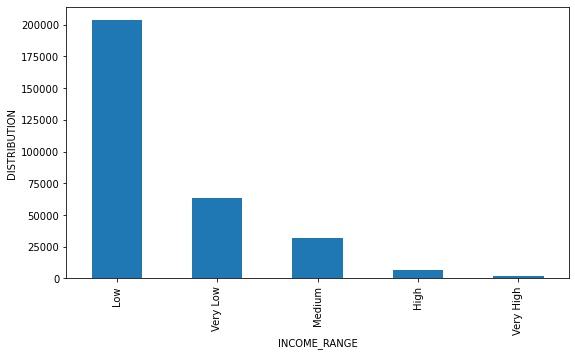

In [32]:
# Binning the AMT_INCOME_TOTAL data
plt.figure(figsize=[9,5])
app_data["INCOME_TOTAL_RANGE"] = pd.cut(app_data["AMT_INCOME_TOTAL"], bins= [0,100000,250000,400000,600000,100000000], labels = ["Very Low","Low","Medium","High","Very High"]).value_counts().plot(kind = "bar")
plt.xlabel("INCOME_RANGE")
plt.ylabel("DISTRIBUTION")
plt.show()

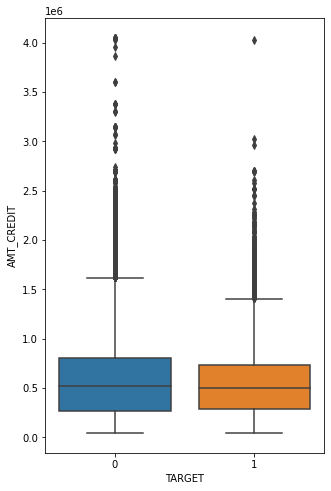

In [33]:
# BoxPlot for AMT_CREDIT
plt.figure(figsize = [5,8])
sns.boxplot(data=app_data, x="TARGET", y="AMT_CREDIT")
plt.show()

- We can observe that there are many outliers present and with AMT_CREDIT being a continuous variable, we can bin its values instead of imputing them with mean/median.

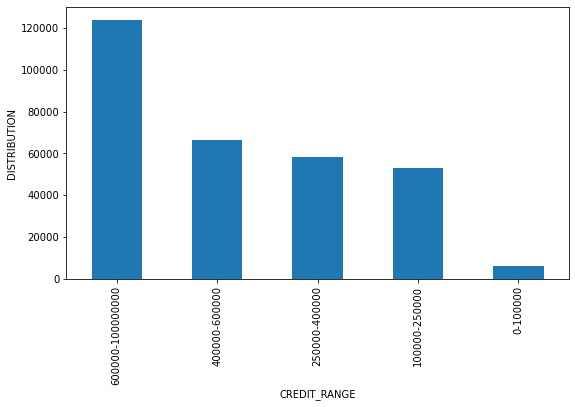

In [34]:
# Binning the AMT_CREDIT data
plt.figure(figsize=[9,5])
app_data["AMT_CREDIT_RANGE"] = pd.cut(app_data["AMT_CREDIT"], bins= [0,100000,250000,400000,600000,100000000], labels = ["0-100000","100000-250000","250000-400000","400000-600000","600000-100000000"]).value_counts().plot(kind = "bar")
plt.xlabel("CREDIT_RANGE")
plt.ylabel("DISTRIBUTION")
plt.show()

In [35]:
# Converting DAYS_BIRTH from days to years
app_data['DAYS_BIRTH']= (app_data['DAYS_BIRTH']/365).astype(int)

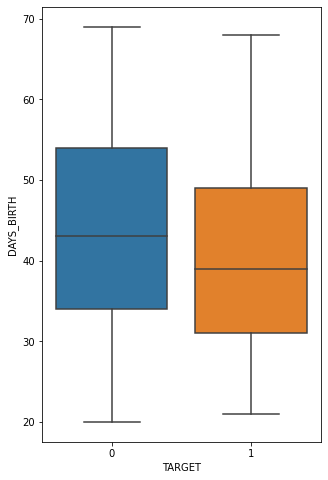

In [36]:
# BoxPlot for DAYS_BIRTH
plt.figure(figsize = [5,8])
sns.boxplot(data=app_data, x="TARGET", y="DAYS_BIRTH")
plt.show()

- We can observe from the boxplot above that there are no outliers present in DAYS_BIRTH.

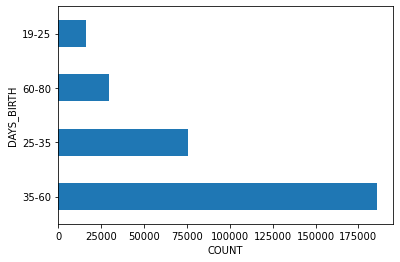

In [37]:
# Binning the 'DAYS_BIRTH' data
app_data['DAYS_BIRTH_RANGE']=pd.cut(app_data['DAYS_BIRTH'], bins=[19,25,35,60,80], labels=['19-25','25-35', '35-60', '60-80']).value_counts().plot(kind = "barh")
plt.xlabel("COUNT")
plt.ylabel("DAYS_BIRTH")
plt.show()

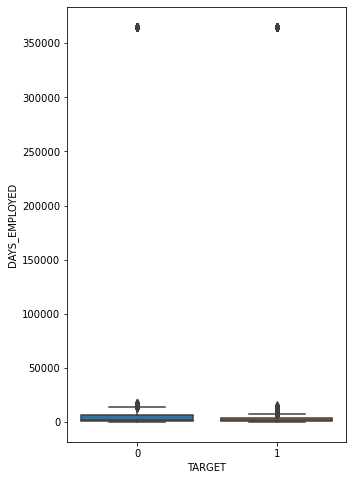

In [38]:
# BoxPlot for DAYS_EMPLOYED
plt.figure(figsize = [5,8])
sns.boxplot(data=app_data, x="TARGET", y="DAYS_EMPLOYED")
plt.show()

- We can observe from the boxplot above that there are many outliers in DAYS_EMPLOYED with days employed for some being greater than 350000 days which is impossible can could be the result of incorrect entry of data and such extreme cases should be isolated from the analysis.

## 3. Analysis

In [39]:
#Analyzing data imbalance in the target variable
app_data['TARGET'].value_counts()/len(app_data)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

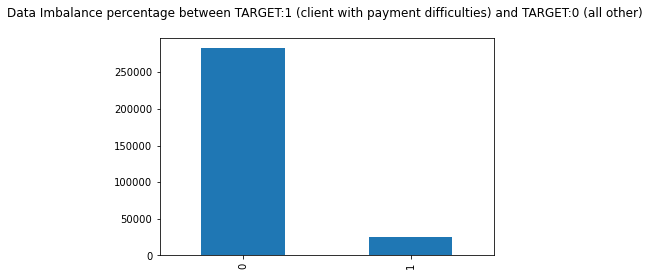

In [40]:
app_data['TARGET'].value_counts().plot.bar()
plt.title('Data Imbalance percentage between TARGET:1 (client with payment difficulties) and TARGET:0 (all other) \n')
plt.show()

- We can clearly observe that the data is highly imbalanced with 91.92% of 'TARGET' value 0 (all other cases/no payment difficulties) and rest 8.07% with 'TARGET' value 1 (clients with payment difficulties).

In [41]:
# Dividing the target variable of dataset into two dataset of target=1(client with payment difficulties) and target=0(all other)
target1 = app_data[app_data['TARGET']==1]
target0 = app_data[app_data['TARGET']==0]

In [42]:
target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,DAYS_BIRTH_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,51,2628,6573.0,1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,161.0,0.0,0.0,0.0,0.0,2.0,2.0,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,47,1262,1182.0,1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,1075.0,0.0,0.0,0.0,2.0,0.0,4.0,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,36,3597,45.0,4409,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1480.0,0.0,0.0,0.0,0.0,0.0,2.0,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,67,365243,5391.0,4199,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"


### Univariate Analysis
#### a. Categorical variable

In [43]:
#barplot for categorical variable
def barplot_application(Attribute, rot = False):
    print(app_data.groupby(Attribute)["TARGET"].value_counts(normalize=True)*100)

    plt.subplot(1,3,1)
    sns.countplot(x = Attribute, data = target1)
    plt.title('Clients with payment difficulties')
    if rot:
            plt.xticks(rotation = 90)

    plt.subplot(1,3,2)
    sns.countplot(x = Attribute, data = target0)
    plt.title('All others/no payment difficulties')
    if rot:
            plt.xticks(rotation = 90)

    plt.subplot(1,3,3)
    default_percent = pd.DataFrame(app_data.groupby([Attribute])['TARGET'].value_counts()/app_data.groupby([Attribute])['TARGET'].count())
    default_percent.columns = ['Target_perc']
    target = pd.pivot_table(default_percent, index =[Attribute], columns =['TARGET'], values ='Target_perc', aggfunc = np.sum) 
    target = target.reset_index()
    target.drop(0, axis = 1, inplace = True)
    target.columns = [Attribute,'Default type']
    sns.barplot(x=Attribute, y= 'Default type',palette="muted", data= target)
    plt.xlabel(Attribute)
    plt.ylabel('Proportion of default')
    plt.title('Proportion of clients having difficulty in repaying loan')
    if rot:
            plt.xticks(rotation = 90)
    plt.show()

In [44]:
# NAME_CONTRACT_TYPE variable
app_data.groupby("TARGET")["NAME_CONTRACT_TYPE"].value_counts(normalize=True)*100

TARGET  NAME_CONTRACT_TYPE
0       Cash loans            90.209986
        Revolving loans        9.790014
1       Cash loans            93.538771
        Revolving loans        6.461229
Name: NAME_CONTRACT_TYPE, dtype: float64

NAME_CONTRACT_TYPE  TARGET
Cash loans          0         91.654087
                    1          8.345913
Revolving loans     0         94.521671
                    1          5.478329
Name: TARGET, dtype: float64


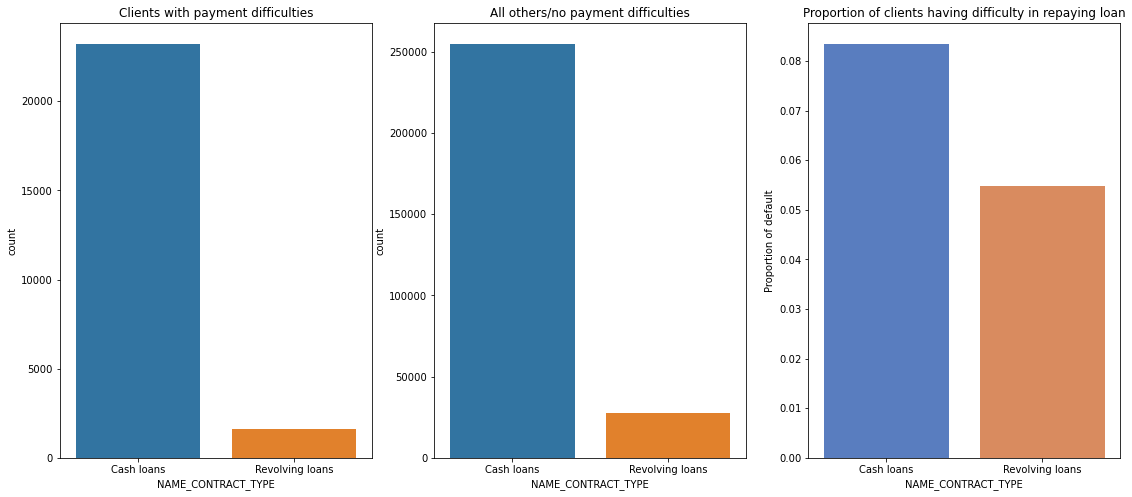

In [45]:
# plotting for 'NAME_CONTRACT_TYPE'
plt.figure(figsize = (19,8))
barplot_application('NAME_CONTRACT_TYPE')

#### Observation

- We can very clearly observe that the proportion of cash loans taken (about 91-95%) is higher than the proportion of revolving loans taken (about 5-8%) by both clients with payment difficulties and with no payment difficulties.
- It can also be concluded from the above information that proportion of default of clients in cash loans (~ 8%) is higher than default in resolving loan (~5%).

In [46]:
# CODE_GENDER variable
app_data.groupby("TARGET")["CODE_GENDER"].value_counts(normalize=True)*100

TARGET  CODE_GENDER
0       F              66.604170
        M              33.395830
1       F              57.079557
        M              42.920443
Name: CODE_GENDER, dtype: float64

CODE_GENDER  TARGET
F            0         93.000672
             1          6.999328
M            0         89.858080
             1         10.141920
Name: TARGET, dtype: float64


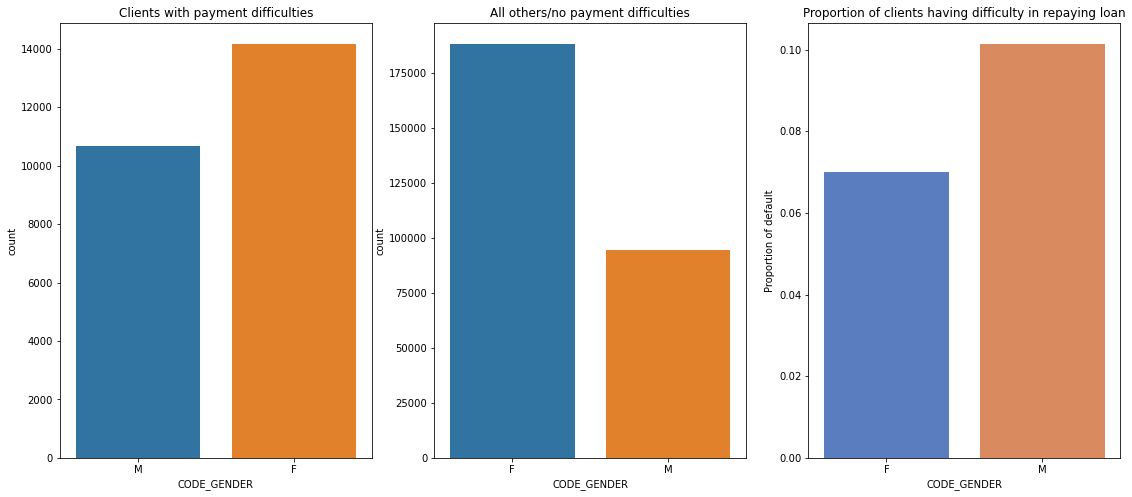

In [47]:
# plotting for 'CODE_GENDER'
plt.figure(figsize = (19,8))
barplot_application('CODE_GENDER')

#### Observation
- We can very clearly observe that the proportion of females clients (about 57-67%) is more than male clients (about 33-43%)in both clients with payment difficulties and with no payment difficulties.
- We can also conclude from the above information that the proportion of male clients defaulting (~ 10%) is greater as compared to female clients defaulting (~ 7%).

In [48]:
# OCCUPATION_TYPE variable
app_data.groupby("TARGET")["OCCUPATION_TYPE"].value_counts(normalize=True)*100

TARGET  OCCUPATION_TYPE      
0       Laborers                 25.625607
        Sales staff              15.064417
        Core staff               13.414134
        Managers                 10.408001
        Drivers                   8.566102
        High skill tech staff     5.545430
        Accountants               4.849590
        Medicine staff            4.136094
        Security staff            3.115182
        Cooking staff             2.765185
        Cleaning staff            2.184107
        Private service staff     1.286265
        Low-skill Laborers        0.900438
        Secretaries               0.629891
        Waiters/barmen staff      0.621063
        Realty agents             0.359344
        HR staff                  0.273662
        IT staff                  0.255488
1       Laborers                 31.476789
        Sales staff              16.671160
        Drivers                  11.360328
        Core staff                9.370788
        Managers        

OCCUPATION_TYPE        TARGET
Accountants            0         95.169673
                       1          4.830327
Cleaning staff         0         90.393295
                       1          9.606705
Cooking staff          0         89.556004
                       1         10.443996
Core staff             0         93.696046
                       1          6.303954
Drivers                0         88.673870
                       1         11.326130
HR staff               0         93.605684
                       1          6.394316
High skill tech staff  0         93.840070
                       1          6.159930
IT staff               0         93.536122
                       1          6.463878
Laborers               0         89.421230
                       1         10.578770
Low-skill Laborers     0         82.847587
                       1         17.152413
Managers               0         93.785972
                       1          6.214028
Medicine staff         0

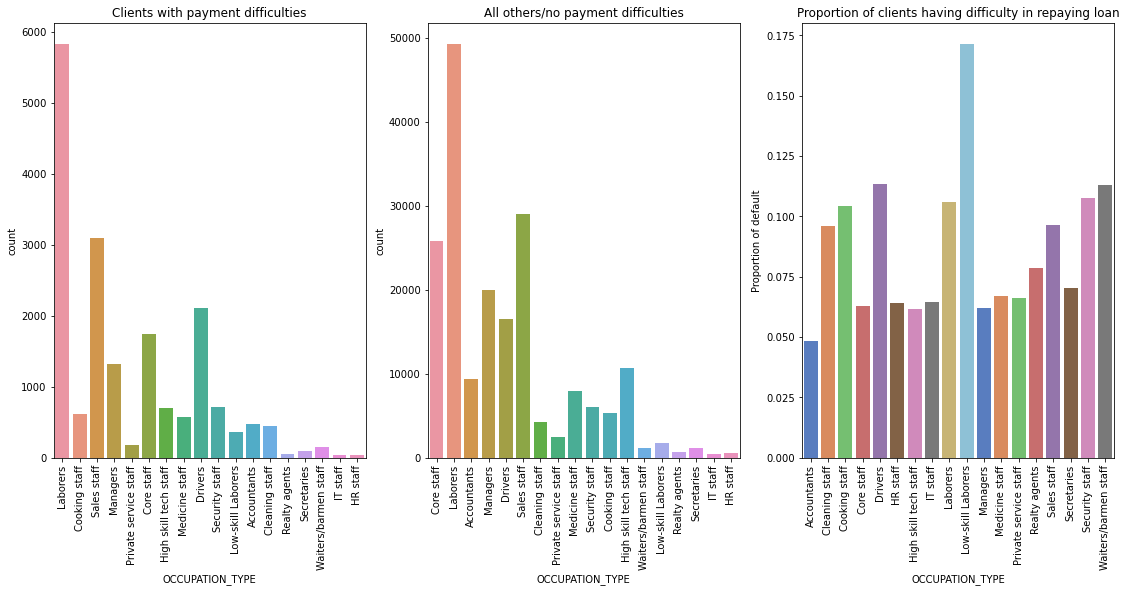

In [49]:
# OCCUPATION_TYPE variable
plt.figure(figsize = (19,8))
barplot_application('OCCUPATION_TYPE', rot=True)

#### Observation

- We can very clearly observe that most clients belong to laborers category (about 25-30%) followed by Sales staff (about 15-17%) and least to the HR category and so on.
- We can also conclude from the above information that Low-skill labourers have the highest default rate (~ 17%) while accountants have the lowest default rate (~ 5%). 

In [50]:
# NAME_INCOME_TYPE variable 
app_data.groupby("TARGET")["NAME_INCOME_TYPE"].value_counts(normalize=True)*100

TARGET  NAME_INCOME_TYPE    
0       Working                 50.780725
        Commercial associate    23.438373
        Pensioner               18.529393
        State servant            7.235590
        Student                  0.006367
        Unemployed               0.004952
        Businessman              0.003537
        Maternity leave          0.001061
1       Working                 61.325277
        Commercial associate    21.591138
        Pensioner               12.012085
        State servant            5.031219
        Unemployed               0.032226
        Maternity leave          0.008056
Name: NAME_INCOME_TYPE, dtype: float64

NAME_INCOME_TYPE      TARGET
Businessman           0         100.000000
Commercial associate  0          92.515743
                      1           7.484257
Maternity leave       0          60.000000
                      1          40.000000
Pensioner             0          94.613634
                      1           5.386366
State servant         0          94.245035
                      1           5.754965
Student               0         100.000000
Unemployed            0          63.636364
                      1          36.363636
Working               0          90.411528
                      1           9.588472
Name: TARGET, dtype: float64


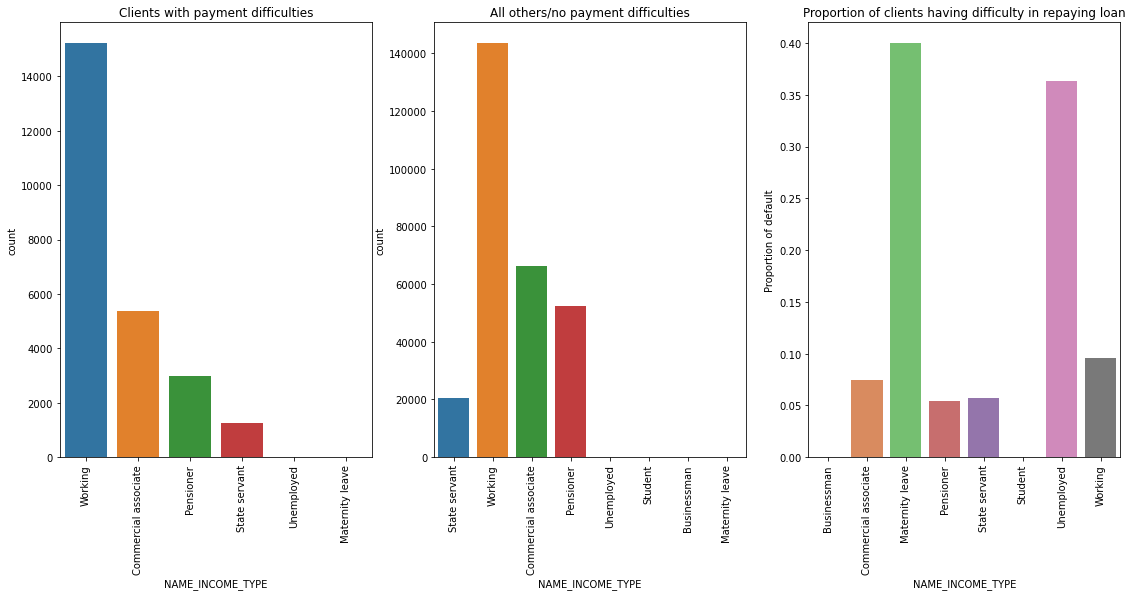

In [51]:
# NAME_INCOME_TYPE variable
plt.figure(figsize = (19,8))
barplot_application('NAME_INCOME_TYPE', rot=True)

#### Observation

- We can very clearly observe that most clients are working, about 20-25% are commercial associates and least number of clients are on maternity leave and so on.
- We can also conclude from the above information that clients who on maternity leave and are unemployed have the highest default rate while the rest of the income types have less than 10% chance of defaulting.

NAME_FAMILY_STATUS    TARGET
Civil marriage        0          90.055416
                      1           9.944584
Married               0          92.440132
                      1           7.559868
Separated             0          91.805766
                      1           8.194234
Single / not married  0          90.192325
                      1           9.807675
Unknown               0         100.000000
Widow                 0          94.175783
                      1           5.824217
Name: TARGET, dtype: float64


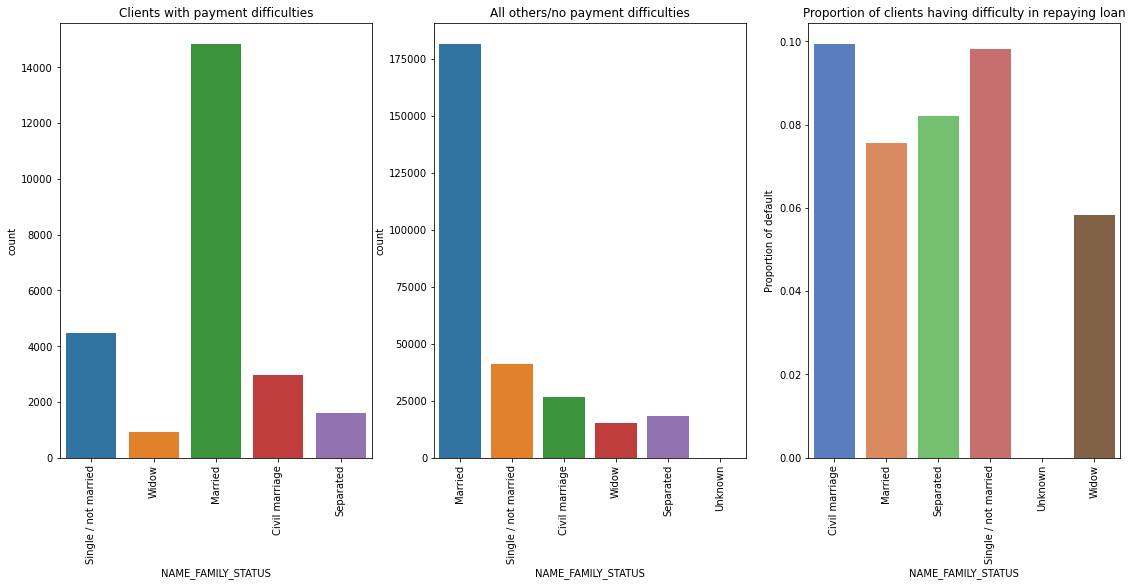

In [52]:
# NAME_FAMILY_STATUS variable
plt.figure(figsize = (19,8))
barplot_application('NAME_FAMILY_STATUS', rot=True)

#### Observation

- We can very clearly observe that most clients are married (~60%), about 15% of the clients are not married, with the least number of clients being widows
- We can also conclude from the above information that clients who have undergone civil marriage or clients who single are most likely to default (~ 10%) with widows having the least default rate (~ 6%).

CNT_CHILDREN  TARGET
0             0          92.288191
              1           7.711809
1             0          91.076425
              1           8.923575
2             0          91.278179
              1           8.721821
3             0          90.368577
              1           9.631423
4             0          87.179487
              1          12.820513
5             0          91.666667
              1           8.333333
6             0          71.428571
              1          28.571429
7             0         100.000000
8             0         100.000000
9             1         100.000000
10            0         100.000000
11            1         100.000000
12            0         100.000000
14            0         100.000000
19            0         100.000000
Name: TARGET, dtype: float64


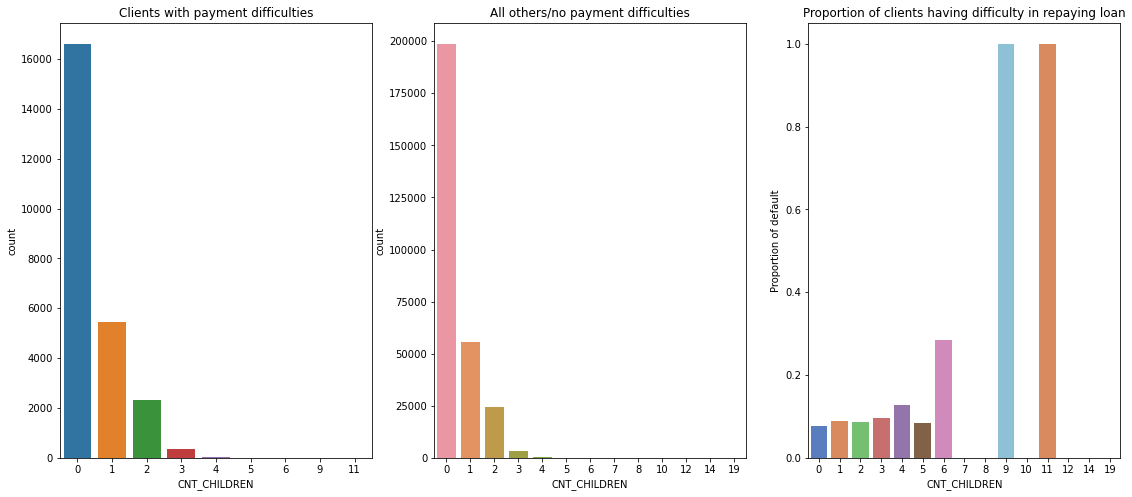

In [53]:
# CNT_CHILDREN variable
plt.figure(figsize = (19,8))
barplot_application('CNT_CHILDREN')

#### Observation

- We can very clearly observe that most clients do not have children (~ 60%), followed by clients who has 1 child (~ 20%) and less than 10 % clients having 2 or more than children.
- We can also conclude from the above information that clients who have 9 or 11 children have approximately 100% chance of defaulting. In general it seems like chances of defaulting increases with the number of children.

In [54]:
# NAME_EDUCATION_TYPE variable
app_data.groupby("TARGET")["NAME_EDUCATION_TYPE"].value_counts(normalize=True)*100

TARGET  NAME_EDUCATION_TYPE          
0       Secondary / secondary special    70.349080
        Higher education                 25.064559
        Incomplete higher                 3.327013
        Lower secondary                   1.202394
        Academic degree                   0.056954
1       Secondary / secondary special    78.646526
        Higher education                 16.149043
        Incomplete higher                 3.512588
        Lower secondary                   1.679758
        Academic degree                   0.012085
Name: NAME_EDUCATION_TYPE, dtype: float64

In [55]:
app_data.groupby("NAME_EDUCATION_TYPE")["TARGET"].value_counts(normalize=True)*100

NAME_EDUCATION_TYPE            TARGET
Academic degree                0         98.170732
                               1          1.829268
Higher education               0         94.644885
                               1          5.355115
Incomplete higher              0         91.515034
                               1          8.484966
Lower secondary                0         89.072327
                               1         10.927673
Secondary / secondary special  0         91.060071
                               1          8.939929
Name: TARGET, dtype: float64

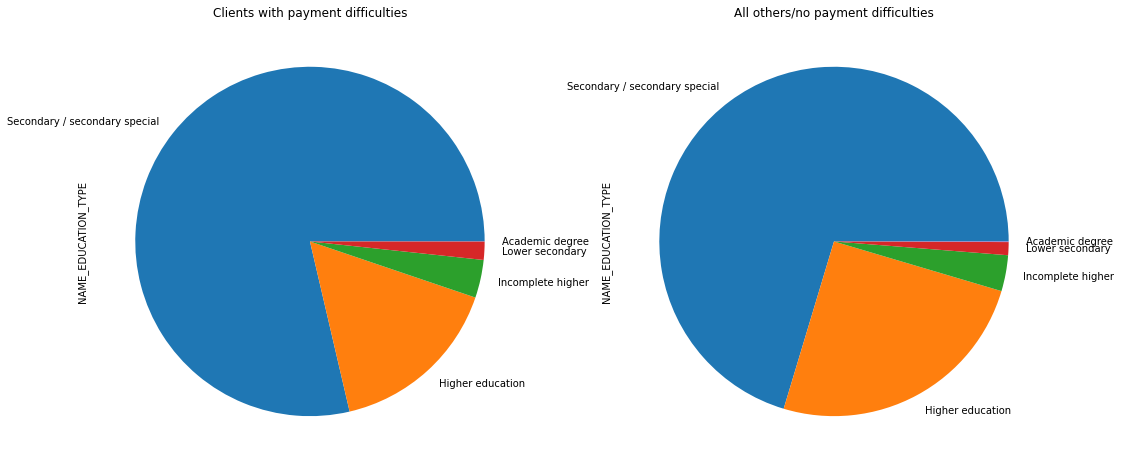

In [56]:
# NAME_EDUCATION_TYPE variable
plt.figure(figsize = (36,9))

plt.subplot(1, 4, 1)
target1['NAME_EDUCATION_TYPE'].value_counts(normalize = True).plot.pie()
plt.title('Clients with payment difficulties')
plt.xticks(rotation = 90)

plt.subplot(1, 4, 2)
target0['NAME_EDUCATION_TYPE'].value_counts(normalize = True).plot.pie()
plt.title('All others/no payment difficulties')
plt.xticks(rotation = 90)
plt.show()

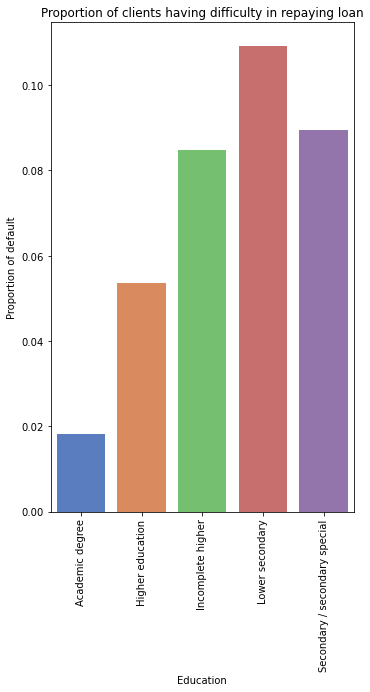

In [57]:
plt.figure(figsize = (25,9))

plt.subplot(1, 4, 3)
default_percent = pd.DataFrame(app_data.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].value_counts()/app_data.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].count())
default_percent.columns = ['Target_perc']
education_target = pd.pivot_table(default_percent, index =['NAME_EDUCATION_TYPE'], columns =['TARGET'], values ='Target_perc', aggfunc = np.sum) 
education_target = education_target.reset_index()
education_target.drop(0, axis = 1, inplace = True)
education_target.columns = ['NAME_EDUCATION_TYPE','Default type']
sns.barplot(x='NAME_EDUCATION_TYPE', y= 'Default type',palette="muted", data= education_target)
plt.xlabel('Education')
plt.ylabel('Proportion of default')
plt.title('Proportion of clients having difficulty in repaying loan')
plt.xticks(rotation =90)
plt.show()

#### Observation

- We can very clearly observe that most clients have completed secondary education (approx. 70-80%), followed by clients who have completed their higher education and so on.
- We can also conclude from the above information that clients having lower secondary education have the highest default rate (~ 11%) followed by clients having secondary education while the clients having academic degrees are least likely to default (~2%).

#### b. Continuous variable 

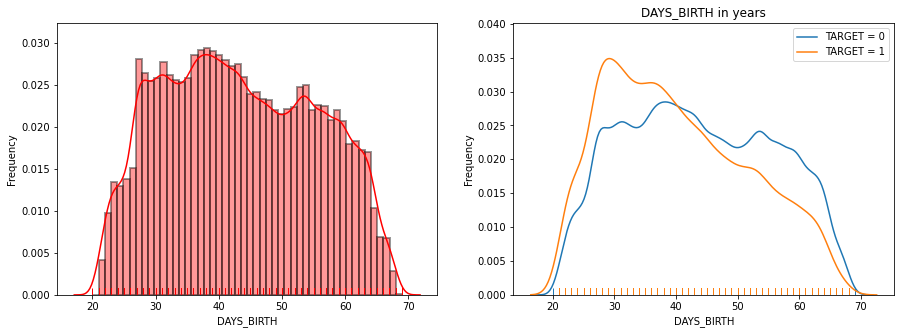

In [58]:
# 'DAYS_BIRTH' variable
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(app_data['DAYS_BIRTH'], bins= 50, kde= True, rug = True, color = 'r', hist_kws=dict(edgecolor="k", linewidth=2))
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.distplot(target0['DAYS_BIRTH'], bins = 50, kde = True, rug= True, hist = False, label = 'TARGET = 0')
sns.distplot(target1['DAYS_BIRTH'], bins = 50, kde = True, rug = True, hist = False, label = 'TARGET = 1')
plt.ylabel("Frequency")
plt.title("DAYS_BIRTH in years")
plt.legend()
plt.show()

#### Observation

- From the above graphs including both the target variables (0 & 1) we can observe clients of all ages, with the most number of clients being around 40 years.
- We can also conclude from above that relatively younger clients have higher default rate with most of them placed around 30 years in DAYS_BIRTH.
Note- The above plot for DAYS_BIRTH has been converted from days to years for better analysis.

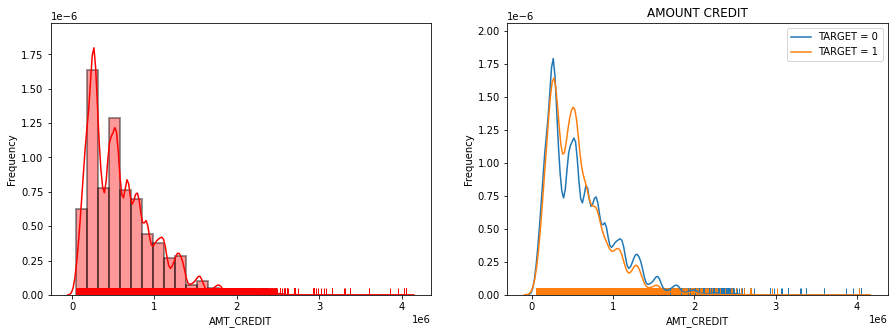

In [59]:
# 'AMT_CREDIT' variable
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(app_data['AMT_CREDIT'], bins= 30, kde= True, rug = True, color = 'r', hist_kws=dict(edgecolor="k", linewidth=2))
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.distplot(target0['AMT_CREDIT'], bins = 50, kde = True, rug= True, hist = False, label = 'TARGET = 0')
sns.distplot(target1['AMT_CREDIT'], bins = 50, kde = True, rug = True, hist = False, label = 'TARGET = 1')
plt.ylabel("Frequency")
plt.title("AMOUNT CREDIT")
plt.legend()
plt.show()

#### Observation

- We can clearly observe that credit amount of the loan lies mostly around 200000-1000000 for both target variables (0 & 1).
- We can also conclude from above that the lesser loan credit amount, the higher the default rate.

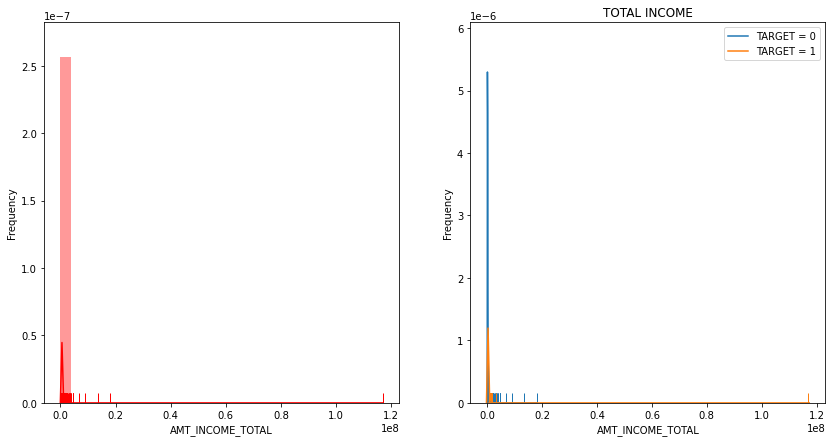

In [60]:
# 'AMT_INCOME_TOTAL' variable
plt.figure(figsize = (14,7))

plt.subplot(1,2,1)
sns.distplot(app_data['AMT_INCOME_TOTAL'], bins= 30, kde= True, rug = True, color = 'r')
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.distplot(target0['AMT_INCOME_TOTAL'], bins = 50, kde = True, rug= True, hist = False, label = 'TARGET = 0')
sns.distplot(target1['AMT_INCOME_TOTAL'], bins = 50, kde = True, rug= True, hist = False, label = 'TARGET = 1')
plt.ylabel("Frequency")
plt.title("TOTAL INCOME")
plt.legend()
plt.show()

#### Observation

- We can observe that income of clients of both target types lie mostly around 10000000 with the presence of some outliers as well.


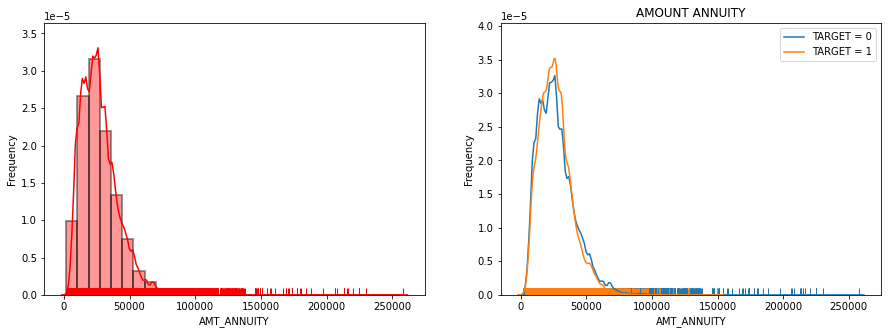

In [61]:
# 'AMT_ANNUITY' variable
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(app_data['AMT_ANNUITY'], bins= 30, kde= True, rug = True, color = 'r', hist_kws=dict(edgecolor="k", linewidth=2))
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.distplot(target0['AMT_ANNUITY'], bins = 50, kde = True, rug= True, hist = False, label = 'TARGET = 0')
sns.distplot(target1['AMT_ANNUITY'], bins = 50, kde = True, rug = True, hist = False, label = 'TARGET = 1')
plt.ylabel("Frequency")
plt.title("AMOUNT ANNUITY")
plt.legend()
plt.show()

#### Observation

- We can clearly observe the annuity amount to be similar for both target types mostly concentrated around 40000.


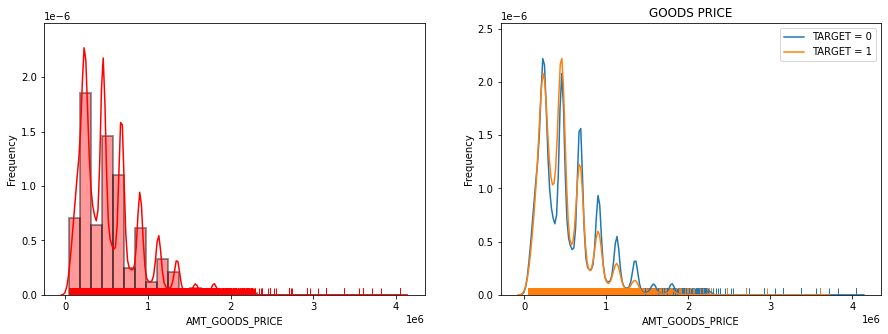

In [62]:
# 'AMT_GOODS_PRICE' variable
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(app_data['AMT_GOODS_PRICE'], bins= 30, kde= True, rug = True, color = 'r', hist_kws=dict(edgecolor="k", linewidth=2))
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.distplot(target0['AMT_GOODS_PRICE'], bins = 50, kde = True, rug= True, hist = False, label = 'TARGET = 0')
sns.distplot(target1['AMT_GOODS_PRICE'], bins = 50, kde = True, rug = True, hist = False, label = 'TARGET = 1')
plt.ylabel("Frequency")
plt.title("GOODS PRICE")
plt.legend()
plt.show()

#### Observation

- We can clearly observe that both curves have almost similar frequency distribution, such that goods for which the clients have received loan are mostly concentrated in the range 200000-700000.
- Also, at this range we can see clients are more defaulted than at the higher range of the goods price.

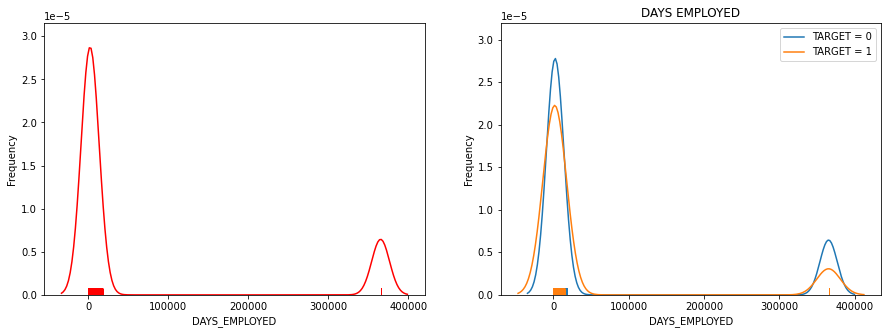

In [63]:
# 'DAYS_EMPLOYED' variable
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(app_data['DAYS_EMPLOYED'], bins= 30, kde= True, rug = True, color = 'r', hist= False)
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.distplot(target0['DAYS_EMPLOYED'], bins = 50, kde = True, rug= True, hist = False, label = 'TARGET = 0')
sns.distplot(target1['DAYS_EMPLOYED'], bins = 50, kde = True, rug = True, hist = False, label = 'TARGET = 1')
plt.ylabel("Frequency")
plt.title("DAYS EMPLOYED")
plt.legend()
plt.show()

#### Observation
- We can clearly observe that the data seems to be unreliable due some errors since some clients are employed for more than 100 years, while some negative values might suggest some clients to be unemployed.

### Bivariate Analysis

#### a. Numerical- Numerical Analysis

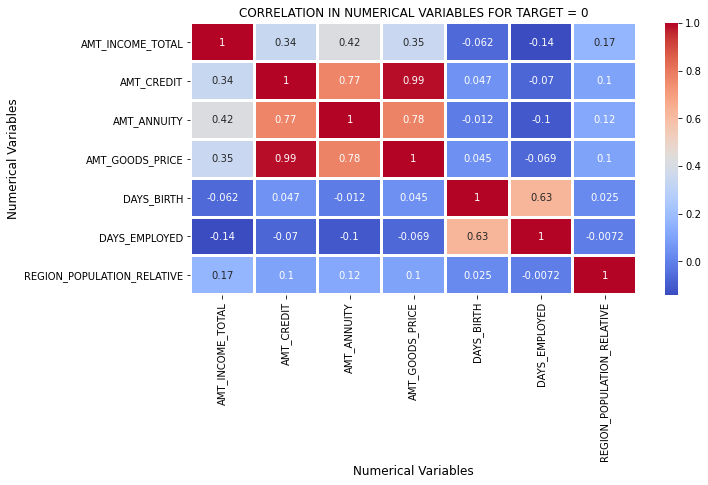

In [64]:
# plotting heatmap to visualize the correlation for TARGET = 0 
plt.figure(figsize = (10,5))

sns.heatmap(target0[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE']].corr(),
            annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Numerical Variables", fontdict={"fontsize": 12})
plt.ylabel("Numerical Variables", fontdict={"fontsize": 12})
plt.title("CORRELATION IN NUMERICAL VARIABLES FOR TARGET = 0")
plt.show()

#### Observation

- Credit amount and Goods price amount has the highest correlation of 0.99, which is obvious since the client is opting for a loan which is equal to the price of those goods.
- Annuity ammount and Goods price amount also have a high correlation of about 0.78 which is pretty obvious since the annuity amount is decided by the price of the goods (also credit amount).
- Therefore, as suggested in the above two points Credit amount and annuity amount also have a correlation of 0.77 as the annuity amount is decided based upon on the credit amount.
- Income amount has a correlation of 0.42 with annuity amount suggesting that the annuity amount might be decided based upon the client's total income.
- Income amount and credit amount have a correlation of 0.34 and goods price and income amount have a correlation of 0.35, suggesting why the clients are able to repay their loans.

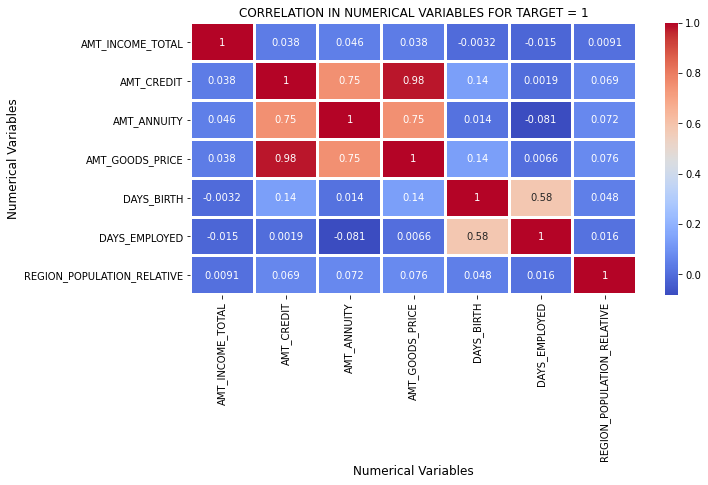

In [65]:
# plotting heatmap to visualize the correlation for TARGET = 1
plt.figure(figsize = (10,5))

sns.heatmap(target1[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE']].corr(),
            annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Numerical Variables", fontdict={"fontsize": 12})
plt.ylabel("Numerical Variables", fontdict={"fontsize": 12})
plt.title("CORRELATION IN NUMERICAL VARIABLES FOR TARGET = 1")
plt.show()

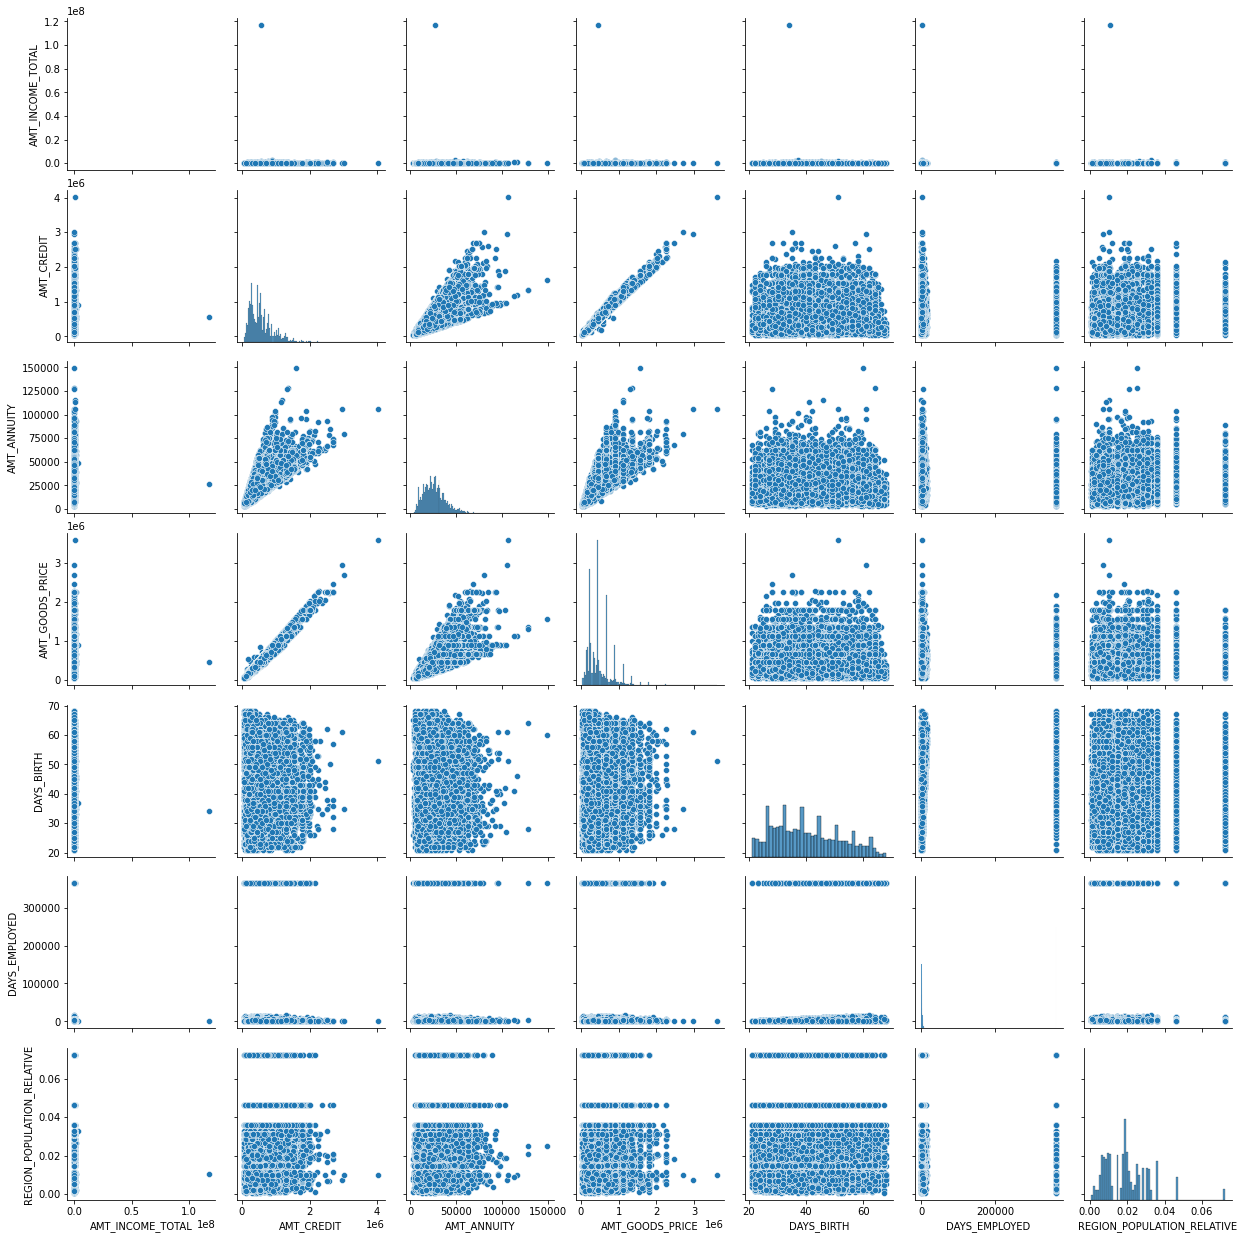

In [66]:
#Plotting pairplot for Target =1
pair = target1[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE']]
sns.pairplot(pair)

plt.show()

#### Observation
(From both heatmap and pairplot)

- Credit amount and Goods price amount has the highest correlation of 0.98, which is obvious since the client is opting for a loan which is equal to the price of those goods.
- Annuity amount and Goods price amount also have a high correlation of about 0.75 which is pretty obvious since the annuity amount is decided by the price of the goods (also credit amount).
- Therefore, as suggested in the above two points Credit amount and annuity amount also have a correlation of 0.75 as the annuity amount is decided based upon on the credit amount.
- Income amount and credit amount have a small correlation of 0.038 and annuity amount and income amount have a correlation of 0.046, suggesting why the clients are facing difficulty while repaying their loans.

#### b. Categorical- Categorical Analysis

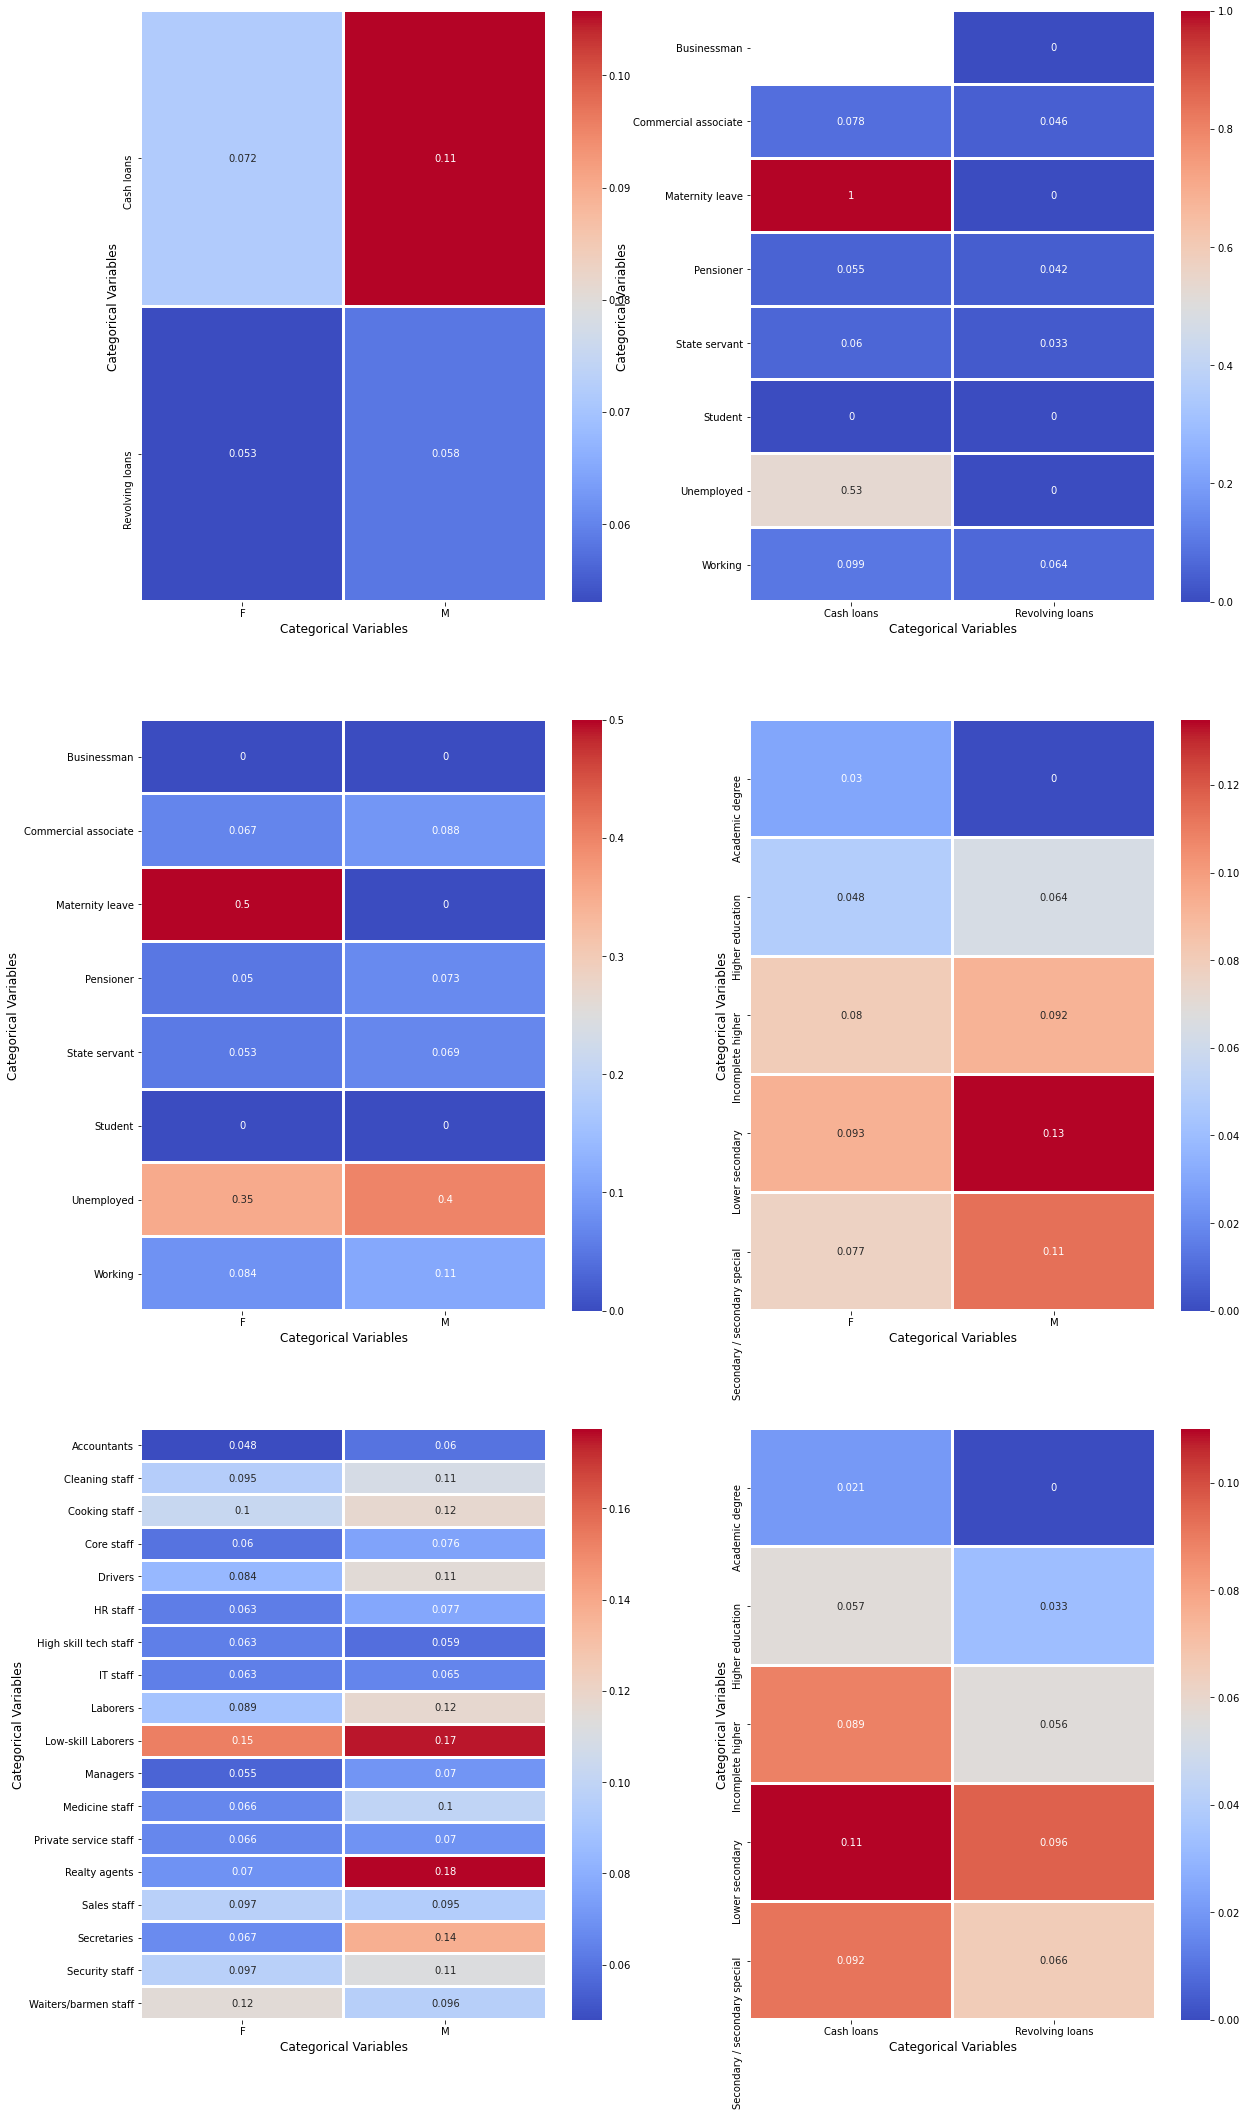

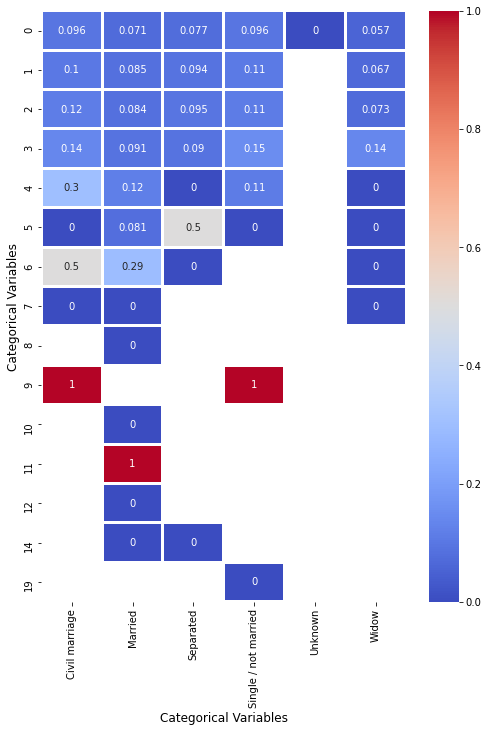

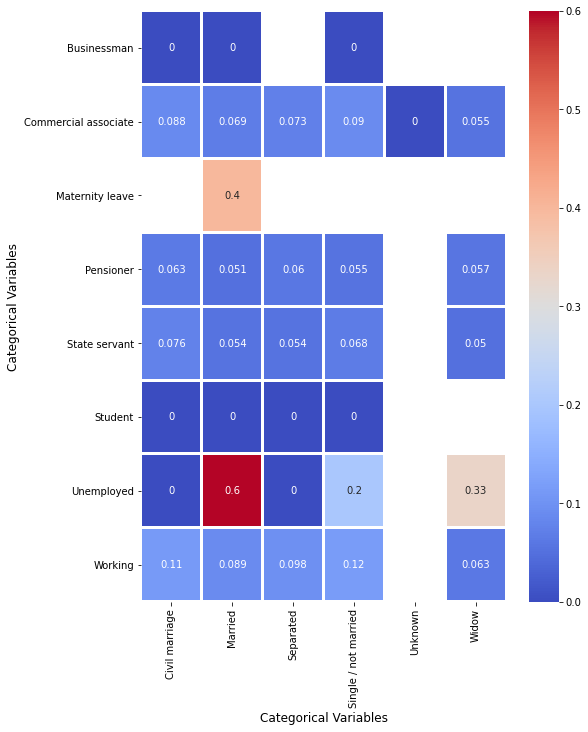

In [67]:
#plotting heatmap for correlation in categorical variables
plt.figure(figsize=(20,50))
plt.title("CORRELATION IN CATEGORICAL VARIABLES")

res = pd.pivot_table(data=app_data, index="NAME_CONTRACT_TYPE", columns="CODE_GENDER", values = "TARGET")

plt.subplot(4,2,1)
sns.heatmap(res, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Categorical Variables", fontdict={"fontsize": 12})
plt.ylabel("Categorical Variables", fontdict={"fontsize": 12})

res = pd.pivot_table(data=app_data, index="NAME_INCOME_TYPE", columns="NAME_CONTRACT_TYPE", values = "TARGET")

plt.subplot(4,2,2)
sns.heatmap(res, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Categorical Variables", fontdict={"fontsize": 12})
plt.ylabel("Categorical Variables", fontdict={"fontsize": 12})

res = pd.pivot_table(data=app_data, index="NAME_INCOME_TYPE", columns="CODE_GENDER", values = "TARGET")

plt.subplot(4,2,3)
sns.heatmap(res, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Categorical Variables", fontdict={"fontsize": 12})
plt.ylabel("Categorical Variables", fontdict={"fontsize": 12})

res = pd.pivot_table(data=app_data, index="NAME_EDUCATION_TYPE", columns="CODE_GENDER", values = "TARGET")

plt.subplot(4,2,4)
sns.heatmap(res, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Categorical Variables", fontdict={"fontsize": 12})
plt.ylabel("Categorical Variables", fontdict={"fontsize": 12})

res = pd.pivot_table(data=app_data, index="OCCUPATION_TYPE", columns="CODE_GENDER", values = "TARGET")

plt.subplot(4,2,5)
sns.heatmap(res, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Categorical Variables", fontdict={"fontsize": 12})
plt.ylabel("Categorical Variables", fontdict={"fontsize": 12})

res = pd.pivot_table(data=app_data, index="NAME_EDUCATION_TYPE", columns="NAME_CONTRACT_TYPE", values = "TARGET")

plt.subplot(4,2,6)
sns.heatmap(res, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Categorical Variables", fontdict={"fontsize": 12})
plt.ylabel("Categorical Variables", fontdict={"fontsize": 12})
plt.show()

res = pd.pivot_table(data=app_data, index="CNT_CHILDREN", columns="NAME_FAMILY_STATUS", values = "TARGET")
plt.figure(figsize=(18,50))
plt.subplot(4,2,7)
sns.heatmap(res, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Categorical Variables", fontdict={"fontsize": 12})
plt.ylabel("Categorical Variables", fontdict={"fontsize": 12})
plt.show()

res = pd.pivot_table(data=app_data, index="NAME_INCOME_TYPE", columns="NAME_FAMILY_STATUS", values = "TARGET")
plt.figure(figsize=(18,50))
plt.subplot(4,2,8)
sns.heatmap(res, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Categorical Variables", fontdict={"fontsize": 12})
plt.ylabel("Categorical Variables", fontdict={"fontsize": 12})
plt.show()

#### Observation

- It is clearly evident that male clients who have opted for cash loans are most likely to default.

- Clients on maternity leave are most likely to default.
- Unemployed clients who have opted for cash loans are more likely to default.

- Female clients on maternity leave are most likely to default.
- Unemployed clients have more or less the same high default rate irrespective of gender.

- Male clients are more likely to default irrespective of the education type, with male client having lower secondary education having highest default rate.

- Male clients who are realty agents are more likely to default as compared to clients in other job types.
- Low skill laborers have comparably higher defaulting chance and accountants have comparably lower defaulting chance  irrespective of gender.

- Clients with lower secondary education are more likely to default irrespective of loan type.
- Clients who opted for cash loans are most likely to default irrespective of their education level.

- Clients having 9 or 11 children are most likely to default.
- Clients who have 5 children and are separated have a high default rate.
- Clients who have undergone civil marriage and have 6 children are also most likely to default.

- Clients who are unemployed and married are most likely to default.
- Clients who are unemployed and are widow also have a high default rate.
- Married clients who are on maternity leave also a high default rate.


#### c. Numerical- categorical analysis

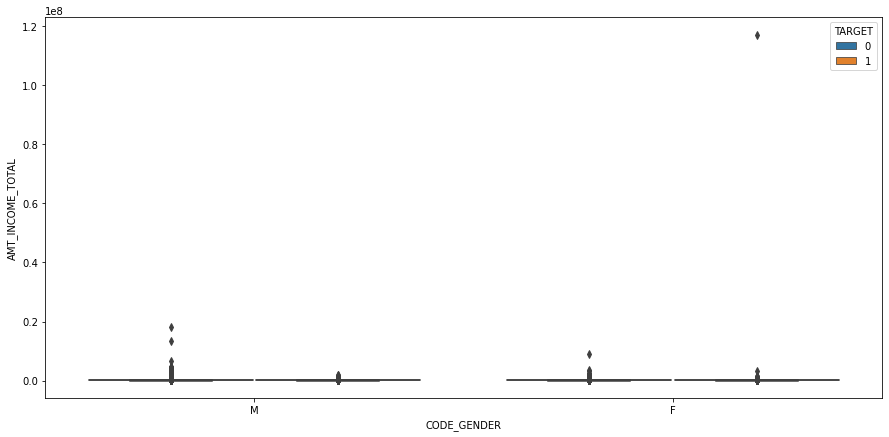

In [68]:
#plotting boxplot to analyze numerical-categorical variables
# BoxPlots for CODE_GENDER vs AMT_INCOME_TOTAL
plt.figure(figsize=[15,7])

sns.boxplot(data = app_data, x='CODE_GENDER', y= 'AMT_INCOME_TOTAL', hue = "TARGET")
plt.show()

#### Observation 
- Presence of an extreme outlier in the data is making visualization difficult.
- Almost all the plots have outliers.

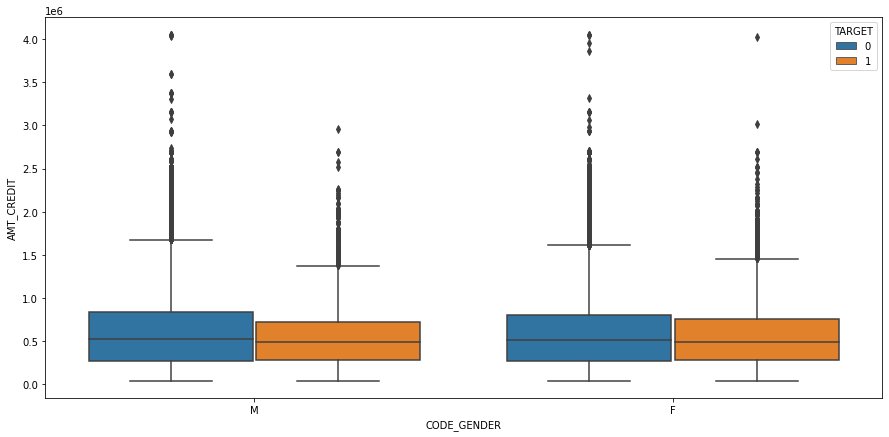

In [69]:
# BoxPlots for CODE_GENDER vs AMT_CREDIT
plt.figure(figsize=[15,7])

sns.boxplot(data = app_data, x='CODE_GENDER', y= 'AMT_CREDIT', hue = "TARGET")
plt.show()

#### Observation 
- The median of the boxplot and the spread of the outliers for credit amount is almost same across both males and females.
- Thus, we can say that gender is not a deciding factor for the credit amount.

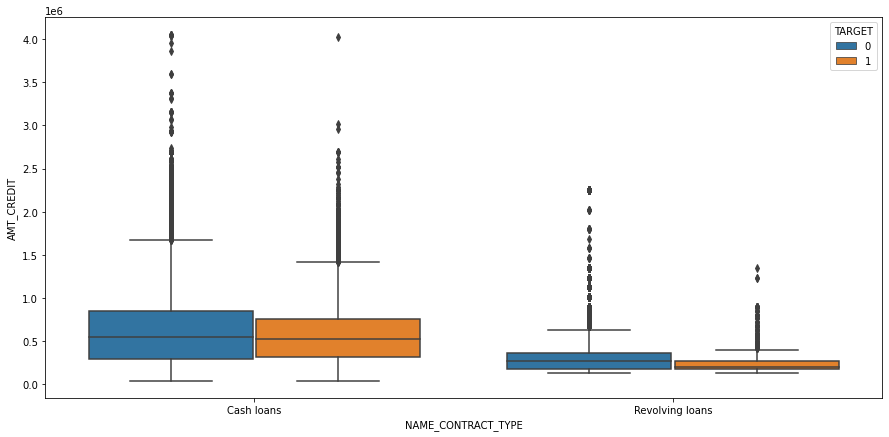

In [70]:
# BoxPlots for NAME_CONTRACT_TYPE vs AMT_CREDIT
plt.figure(figsize=[15,7])

sns.boxplot(data = app_data, x='NAME_CONTRACT_TYPE', y= 'AMT_CREDIT', hue = "TARGET")
plt.show()

#### Observation 
- From the boxplot we can see that the credit amount for cash loans is higher than for revolving loans.
- We observe that the credit amount for Target =1 clients is concentrated in the lower end of the box plot, which indicates the difficulty in loan payment for lesser credit amounts.

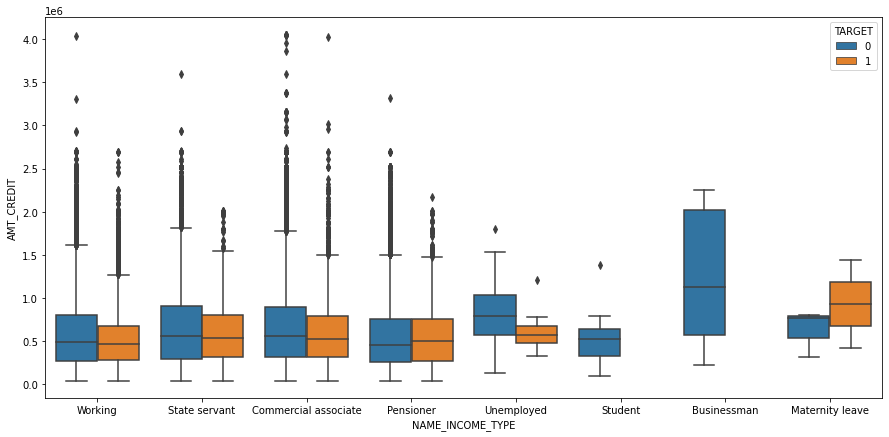

In [71]:
# BoxPlots for NAME_INCOME_TYPE vs AMT_CREDIT
plt.figure(figsize=[15,7])

sns.boxplot(data = app_data, x='NAME_INCOME_TYPE', y= 'AMT_CREDIT', hue = "TARGET")
plt.show()

#### Observation 
- We observe that there are no boxplots for Businessman and Student in target =1 which indicates they do not have difficulties in repaying loan (no defaulters).
- The box plot for Businessman has a big IQR indicating a huge range of credit amount for the client.

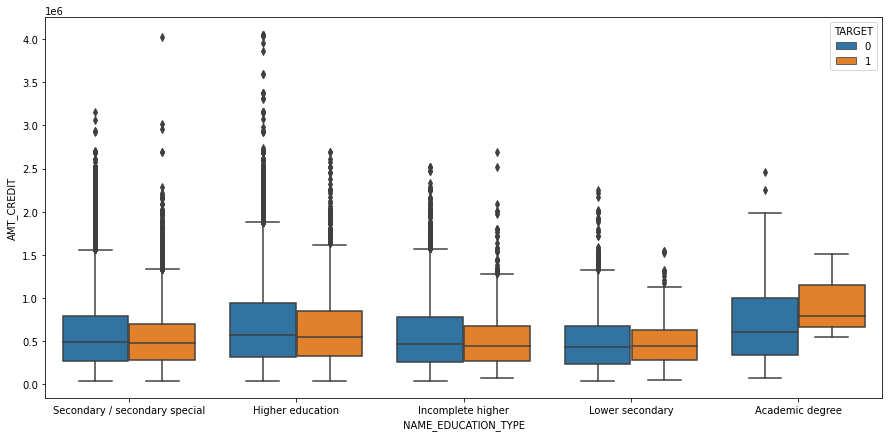

In [72]:
# BoxPlots for NAME_EDUCATION_TYPE vs AMT_CREDIT
plt.figure(figsize=[15,7])

sns.boxplot(data = app_data, x='NAME_EDUCATION_TYPE', y= 'AMT_CREDIT', hue = "TARGET")
plt.show()

#### Observation 
- We observe through the boxplot that clients having an academic degree are facing higher credit amounts which might cause difficulty in repaying the loan.

### Top 10 correlations for the Client with payment difficulties and all other cases

In [73]:
# Top 10 correlated variables: target 1 dataframe

corr = target1.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr_df.unstack().reset_index()
corr_df.columns = ['Var1', 'Var2', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df['Correlation'] = round(corr_df['Correlation'], 3)
corr_df['Absolute Correlation'] = abs(corr_df['Correlation'])
corr_df.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation,Absolute Correlation
226,AMT_GOODS_PRICE,AMT_CREDIT,0.983,0.983
759,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.957,0.957
668,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885,0.885
911,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.848,0.848
1025,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.779,0.779
227,AMT_GOODS_PRICE,AMT_ANNUITY,0.753,0.753
189,AMT_ANNUITY,AMT_CREDIT,0.752,0.752
341,DAYS_EMPLOYED,DAYS_BIRTH,0.582,0.582
873,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.498,0.498
987,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.472,0.472


In [74]:
# Top 10 correlated variables: target 0 dataframe

corr = target0.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr_df.unstack().reset_index()
corr_df.columns = ['Var1', 'Var2', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df['Correlation'] = round(corr_df['Correlation'], 3)
corr_df['Absolute Correlation'] = abs(corr_df['Correlation'])
corr_df.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation,Absolute Correlation
226,AMT_GOODS_PRICE,AMT_CREDIT,0.987,0.987
759,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950,0.950
668,CNT_FAM_MEMBERS,CNT_CHILDREN,0.879,0.879
911,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.862,0.862
1025,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830,0.830
227,AMT_GOODS_PRICE,AMT_ANNUITY,0.777,0.777
189,AMT_ANNUITY,AMT_CREDIT,0.771,0.771
341,DAYS_EMPLOYED,DAYS_BIRTH,0.626,0.626
873,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.446,0.446
987,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.436,0.436


## Previous Application Data

### Data quality check

In [75]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [76]:
#checking shape of the data frame
prev_app.shape

(1670214, 37)

In [77]:
# Checking for null values
prev_app.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [78]:
# Calculating percentage of null values
prev_null_vals = prev_app.isnull().sum()/len(prev_app)*100
prev_null_vals

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [79]:
# Removing the columns with hogh percentage of null values (>40%)
prev_app.drop(prev_null_vals[prev_null_vals.values>40].index, axis = 1, inplace = True)

In [80]:
# Checking previous dataframe 
prev_app.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,11,Y,1,XNA,Canceled,-14,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,MONDAY,7,Y,1,XNA,Canceled,-21,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,MONDAY,15,Y,1,XNA,Canceled,-386,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,SATURDAY,15,Y,1,XNA,Canceled,-57,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash


In [81]:
#Checking shape of dataframe
prev_app.shape

(1670214, 26)

### Merging the Datasets (prev_app with app_data)

In [82]:
merged_data = app_data.merge(prev_app, on= 'SK_ID_CURR', how = 'left')
merged_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,DAYS_BIRTH_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)",1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,-606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,828.0,0.0,0.0,0.0,0.0,0.0,0.0,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)",1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,-746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,828.0,0.0,0.0,0.0,0.0,0.0,0.0,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)",2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,-828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,828.0,0.0,0.0,0.0,0.0,0.0,0.0,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)",2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15.0,Y,1.0,XAP,Approved,-2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married

In [83]:
# Checking the shape of the merged data
merged_data.shape

(1430155, 77)

### Handling outliers

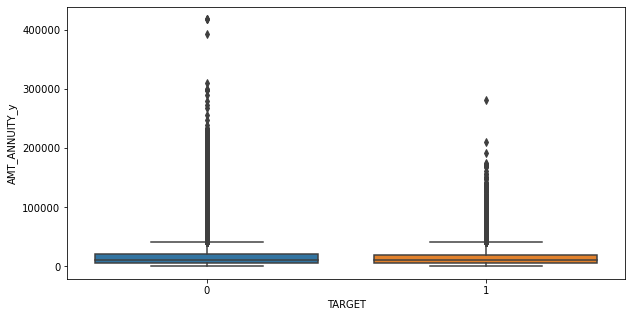

In [84]:
# Boxplot AMT_ANNUITY_y
plt.figure(figsize = (10,5))
sns.boxplot(data = merged_data, x='TARGET', y= 'AMT_ANNUITY_y')
plt.show()

- We can clearly see the presence of outliers in both the target types (0 & 1) with respect to annuity amount.
- Both the target types (0 & 1) seem to have somewhat similar annuity amounts.

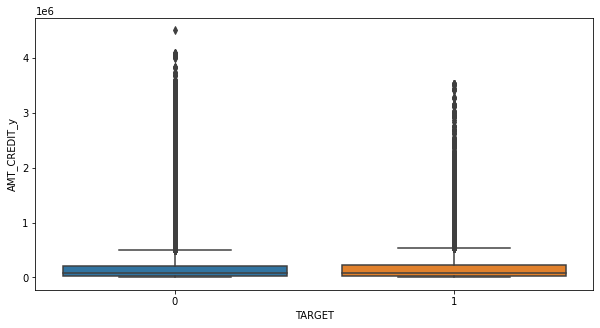

In [85]:
# Boxplot AMT_CREDIT_y
plt.figure(figsize = (10,5))
sns.boxplot(data = merged_data, x='TARGET', y= 'AMT_CREDIT_y')
plt.show()

- We can clearly see the presence of outliers in both the target types (0 & 1) with respect to credit amount.
- Both the target types (0 & 1) seem to have somewhat similar credit amounts.

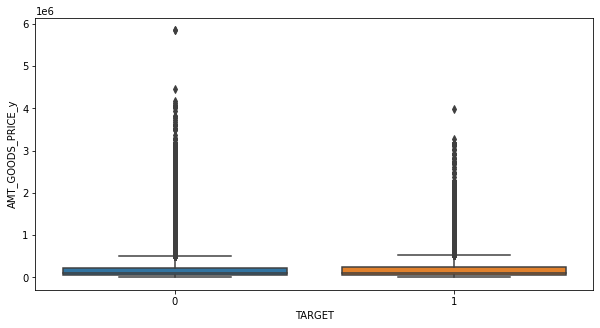

In [86]:
# Boxplot AMT_GOODS_PRICE_y
plt.figure(figsize = (10,5))
sns.boxplot(data = merged_data, x='TARGET', y= 'AMT_GOODS_PRICE_y')
plt.show()

- We can clearly see the presence of outliers in both the target types (0 & 1) with respect to price of goods.
- Both the target types (0 & 1) seem to have somewhat similar price of goods.

### Analysis

#### Univariate Analysis

In [87]:
# Dividing the target variable of dataset into two dataset of target=1(client with payment difficulties) and target=0(all other)
target_1 = merged_data[merged_data['TARGET']==1]
target_0 = merged_data[merged_data['TARGET']==0]

In [88]:
#barplot for categorical variable
def barplot_previous(Attribute, rot = False):

    plt.subplot(1,3,1)
    sns.countplot(x = Attribute, data = target_1)
    plt.title('Clients with payment difficulties')
    if rot:
            plt.xticks(rotation = 90)

    plt.subplot(1,3,2)
    sns.countplot(x = Attribute, data = target_0)
    plt.title('All others/no payment difficulties')
    if rot:
            plt.xticks(rotation = 90)

    plt.subplot(1,3,3)
    default_percent = pd.DataFrame(merged_data.groupby([Attribute])['TARGET'].value_counts()/merged_data.groupby([Attribute])['TARGET'].count())
    default_percent.columns = ['Target_perc']
    target = pd.pivot_table(default_percent, index =[Attribute], columns =['TARGET'], values ='Target_perc', aggfunc = np.sum) 
    target = target.reset_index()
    target.drop(0, axis = 1, inplace = True)
    target.columns = [Attribute,'Default type']
    sns.barplot(x=Attribute, y= 'Default type',palette="muted", data= target)
    plt.xlabel(Attribute)
    plt.ylabel('Proportion of default')
    plt.title('Proportion of clients having difficulty in repaying loan')
    if rot:
            plt.xticks(rotation = 90)
    plt.show()
   

TARGET  CODE_REJECT_REASON
0       XAP                   81.658524
        HC                     9.978309
        LIMIT                  3.234854
        SCO                    2.274612
        CLIENT                 1.617853
        SCOFR                  0.665897
        XNA                    0.304799
        VERIF                  0.216364
        SYSTEM                 0.048786
1       XAP                   74.405852
        HC                    13.999673
        LIMIT                  4.903563
        SCO                    2.666721
        SCOFR                  1.860085
        CLIENT                 1.535633
        XNA                    0.361229
        VERIF                  0.232919
        SYSTEM                 0.034325
Name: CODE_REJECT_REASON, dtype: float64


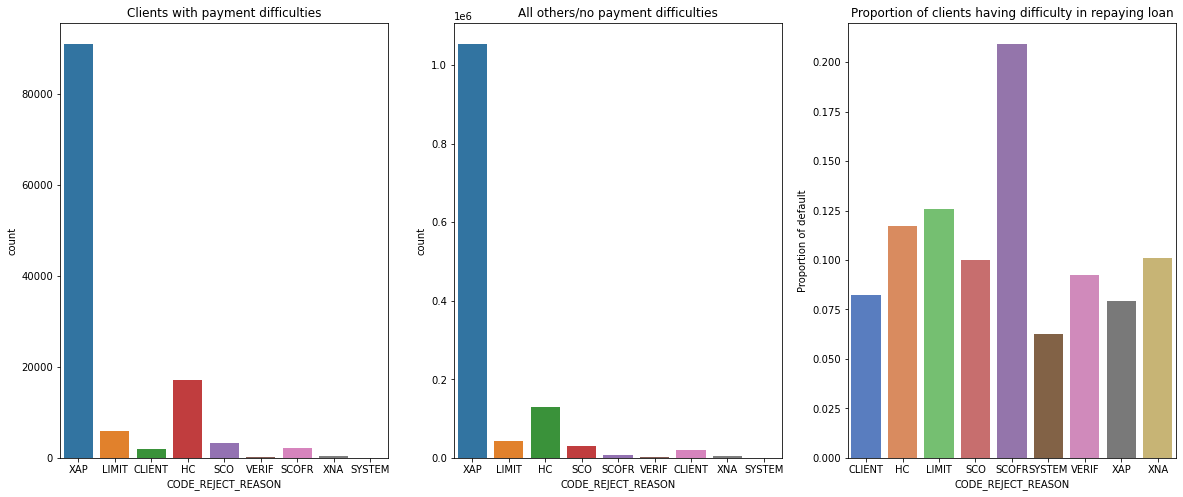

In [89]:
# BarPlots for CODE_REJECT_REASON
print(merged_data.groupby("TARGET")["CODE_REJECT_REASON"].value_counts(normalize=True)*100)
plt.figure(figsize = (20,8))
barplot_previous('CODE_REJECT_REASON')

#### Observation

- We can observe from the above previous application dataset that most of the clients belong to XAP category (about 80%) followed by HC category while least number of clients belong to system.
- Clients belonging to SCOFR category have the highest default rate, followed by LIMIT category with least default rate by SYSTEM.

TARGET  NAME_CONTRACT_STATUS
0       Approved                63.411291
        Canceled                18.247775
        Refused                 16.723081
        Unused offer             1.617853
1       Approved                54.955051
        Refused                 24.058516
        Canceled                19.450801
        Unused offer             1.535633
Name: NAME_CONTRACT_STATUS, dtype: float64


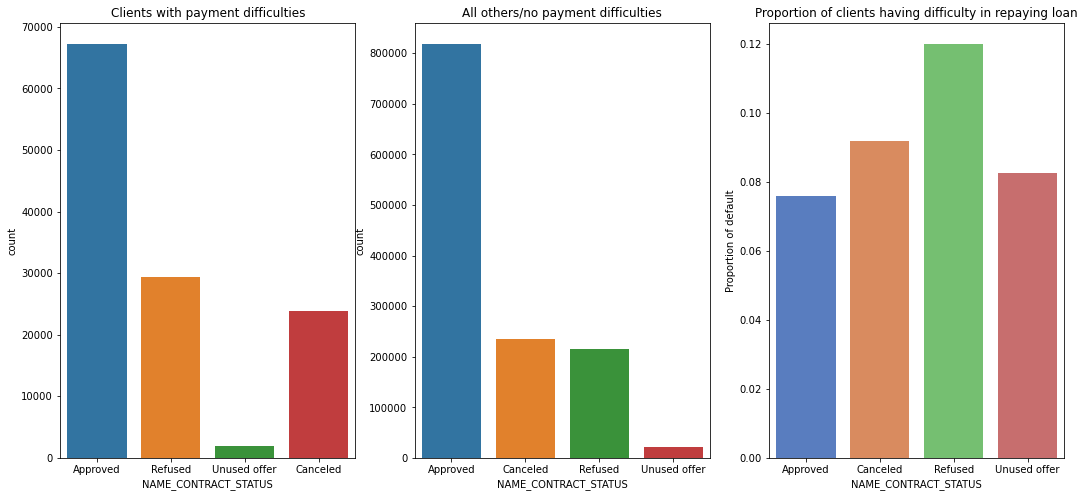

In [90]:
# BarPlots for NAME_CONTRACT_STATUS
print(merged_data.groupby("TARGET")["NAME_CONTRACT_STATUS"].value_counts(normalize=True)*100)
plt.figure(figsize = (18,8))
barplot_previous('NAME_CONTRACT_STATUS')

#### Observation
- We can observe from the above dataset that majority of the clients' loans got approved (about 55-65%), while there were least number of unused loans.
- Clients who got their applications rejected are most likely to default, followed by clients who cancelled their loans while the clients whose applications got approved are least likely to default.

TARGET  NAME_CASH_LOAN_PURPOSE          
0       XAP                                 55.893370
        XNA                                 40.105054
        Repairs                              1.355258
        Other                                0.910604
        Urgent needs                         0.476559
        Buying a used car                    0.166571
        Building a house or an annex         0.156427
        Everyday expenses                    0.142178
        Medicine                             0.125451
        Payments on other loans              0.102297
        Education                            0.092462
        Journey                              0.072096
        Purchase of electronic equipment     0.063268
        Buying a new car                     0.062416
        Wedding / gift / holiday             0.054749
        Buying a home                        0.047780
        Furniture                            0.044527
        Car repairs                      

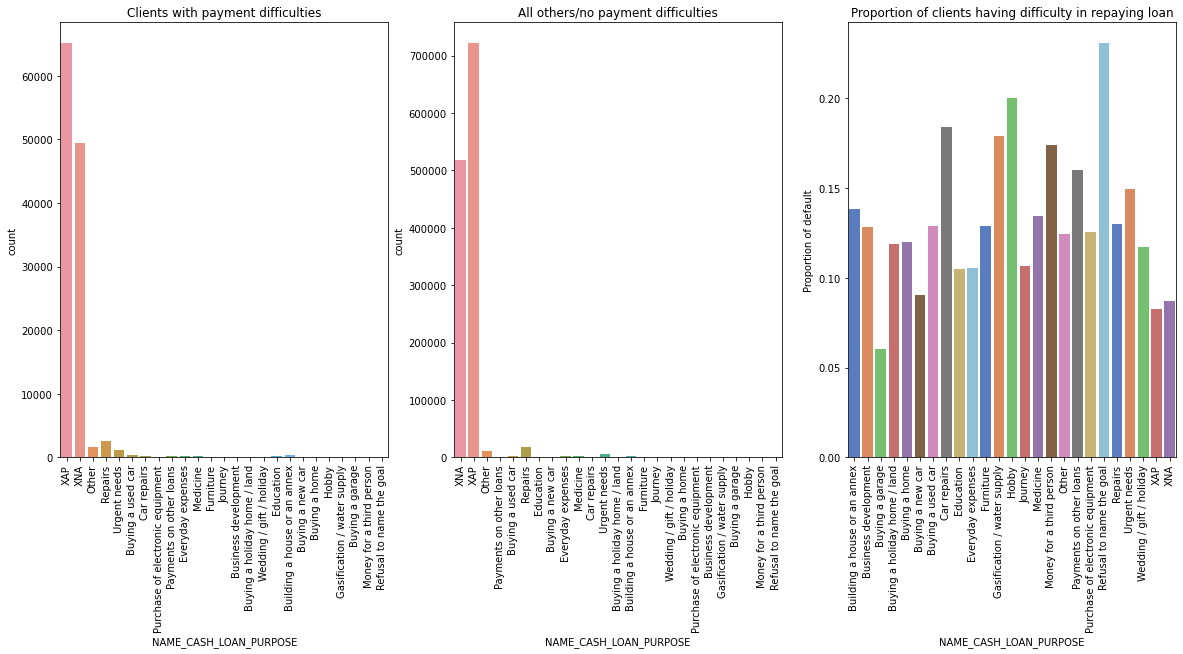

In [91]:
# BarPlots for NAME_CASH_LOAN_PURPOSE
print(merged_data.groupby("TARGET")["NAME_CASH_LOAN_PURPOSE"].value_counts(normalize=True)*100)
plt.figure(figsize = (20,8))
barplot_previous('NAME_CASH_LOAN_PURPOSE', rot = True)

#### Observation
- Clients who refused to name the goal for taking the loan are the highest defaulters, followed by clients who took loan for Hobby purposes, while clients who took loan to buy a garage are least likely to default.

TARGET  NAME_CLIENT_TYPE
0       Repeater            73.354133
        New                 18.290676
        Refreshed            8.247550
        XNA                  0.107640
1       Repeater            73.904871
        New                 19.078947
        Refreshed            6.891141
        XNA                  0.125041
Name: NAME_CLIENT_TYPE, dtype: float64


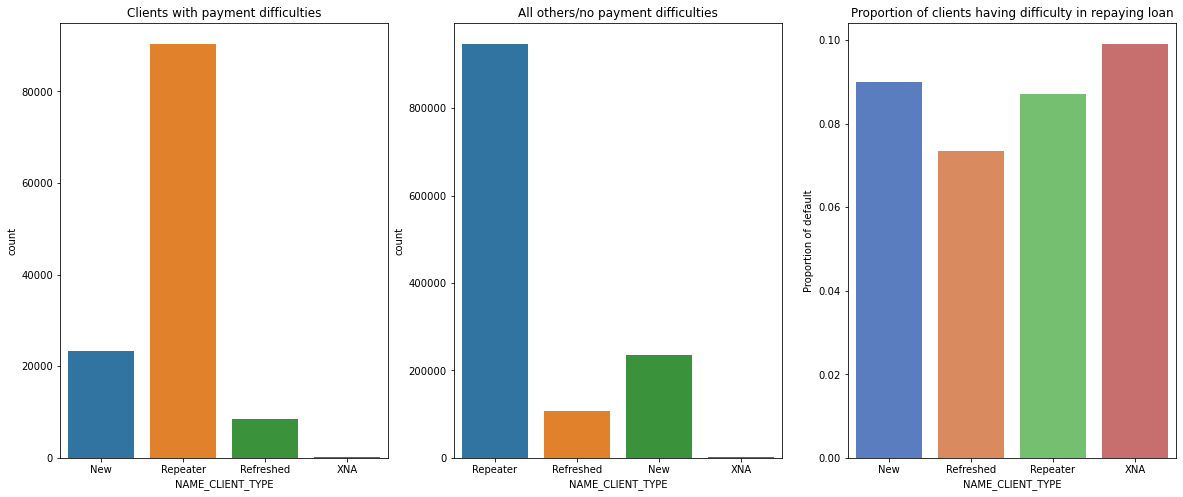

In [92]:
# BarPlots for NAME_CLIENT_TYPE
print(merged_data.groupby("TARGET")["NAME_CLIENT_TYPE"].value_counts(normalize=True)*100)
plt.figure(figsize = (20,8))
barplot_previous('NAME_CLIENT_TYPE')

#### Observation
- Majority of the client type in the above dataset are repeater (~ 73%), followed by new clients and then refreshed.
- We can observe that new clients are most likely to default, followed by repeaters and then refreshed client types.

TARGET  NAME_CONTRACT_TYPE_y
0       Consumer loans          44.686028
        Cash loans              44.106630
        Revolving loans         11.187982
        XNA                      0.019360
1       Cash loans              46.744851
        Consumer loans          39.397679
        Revolving loans         13.805982
        XNA                      0.051487
Name: NAME_CONTRACT_TYPE_y, dtype: float64


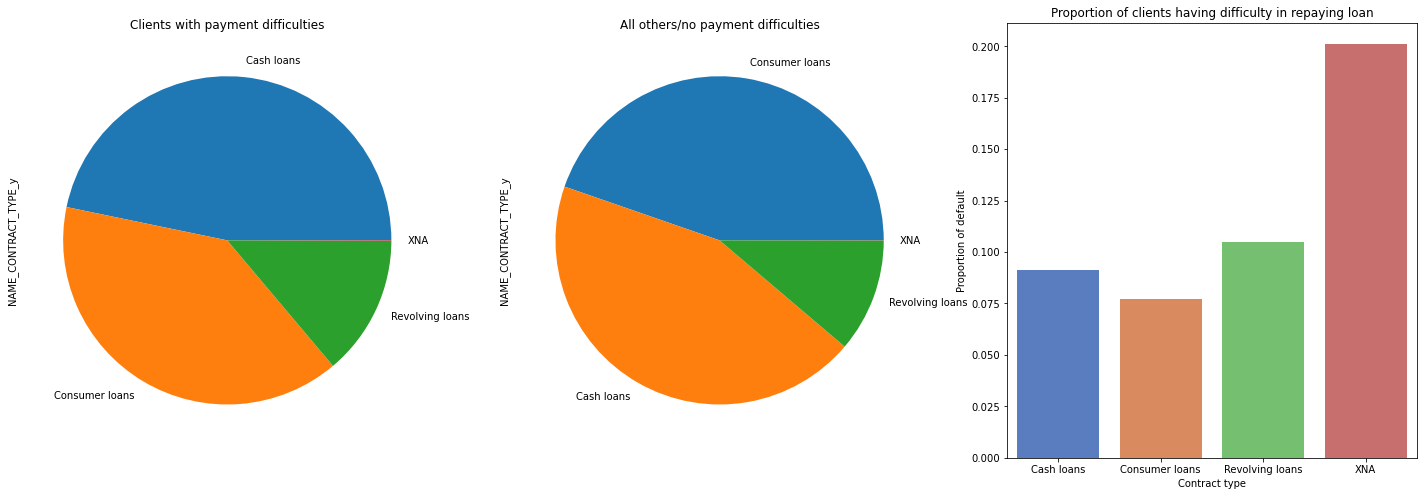

In [93]:
# BarPlots for NAME_CONTRACT_TYPE_y
print(merged_data.groupby("TARGET")["NAME_CONTRACT_TYPE_y"].value_counts(normalize=True)*100)
plt.figure(figsize = (25,8))
plt.subplot(1,3,1)
target_1['NAME_CONTRACT_TYPE_y'].value_counts(normalize = True).plot.pie()
plt.title('Clients with payment difficulties')

plt.subplot(1,3,2)
target_0['NAME_CONTRACT_TYPE_y'].value_counts(normalize = True).plot.pie()
plt.title('All others/no payment difficulties')

plt.subplot(1,3,3)
default_percent = pd.DataFrame(merged_data.groupby(['NAME_CONTRACT_TYPE_y'])['TARGET'].value_counts()/merged_data.groupby(['NAME_CONTRACT_TYPE_y'])['TARGET'].count())
default_percent.columns = ['Target_perc']
target = pd.pivot_table(default_percent, index =['NAME_CONTRACT_TYPE_y'], columns =['TARGET'], values ='Target_perc', aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['NAME_CONTRACT_TYPE_y','Default type']
sns.barplot(x='NAME_CONTRACT_TYPE_y', y= 'Default type',palette="muted", data= target)
plt.xlabel('Contract type')
plt.ylabel('Proportion of default')
plt.title('Proportion of clients having difficulty in repaying loan')
plt.show()

#### Observation

- We can observe from the above previous application dataset that most of the clients have opted for cash and consumer loans (about 40%-45%) while about 10% have opted for revolving loans.
- Clients who have opted for revolving loans have the highest default rate as compared to clients who opted for cash loans and consumer loans.

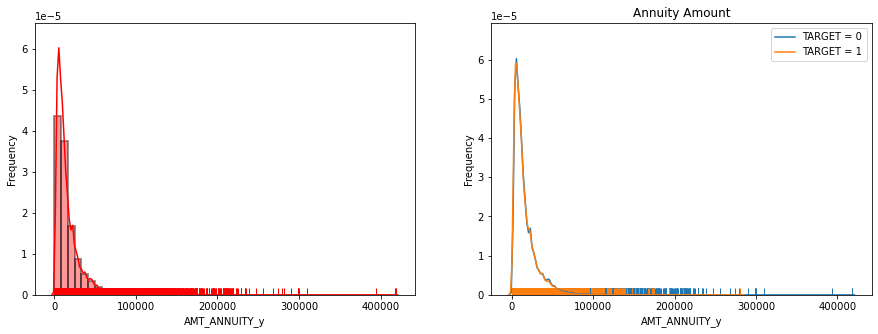

In [94]:
# Analyzing numerical variable
# 'AMT_ANNUITY_y' variable
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(merged_data['AMT_ANNUITY_y'], bins= 50, kde= True, rug = True, color = 'r', hist_kws=dict(edgecolor="k", linewidth=2))
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.distplot(target_0['AMT_ANNUITY_y'], bins = 50, kde = True, rug= True, hist = False, label = 'TARGET = 0')
sns.distplot(target_1['AMT_ANNUITY_y'], bins = 50, kde = True, rug = True, hist = False, label = 'TARGET = 1')
plt.ylabel("Frequency")
plt.title("Annuity Amount")
plt.legend()
plt.show()

#### Observation

- We can observe from above that in the previous application dataset annuity amount is concentrated around 10000.

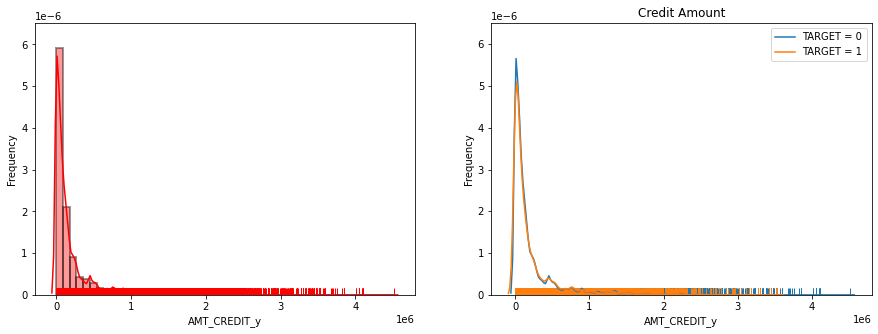

In [95]:
# 'AMT_CREDIT_y' variable
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(merged_data['AMT_CREDIT_y'], bins= 50, kde= True, rug = True, color = 'r', hist_kws=dict(edgecolor="k", linewidth=2))
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.distplot(target_0['AMT_CREDIT_y'], bins = 50, kde = True, rug= True, hist = False, label = 'TARGET = 0')
sns.distplot(target_1['AMT_CREDIT_y'], bins = 50, kde = True, rug = True, hist = False, label = 'TARGET = 1')
plt.ylabel("Frequency")
plt.title("Credit Amount")
plt.legend()
plt.show()

#### Observation

- We can observe from above that in the previous application dataset credit amount is concentrated around 10000.
- Both TARGET =0 and TARGET =1 have similar distribution except that the peak of TARGET =0 is higher at around 10000.

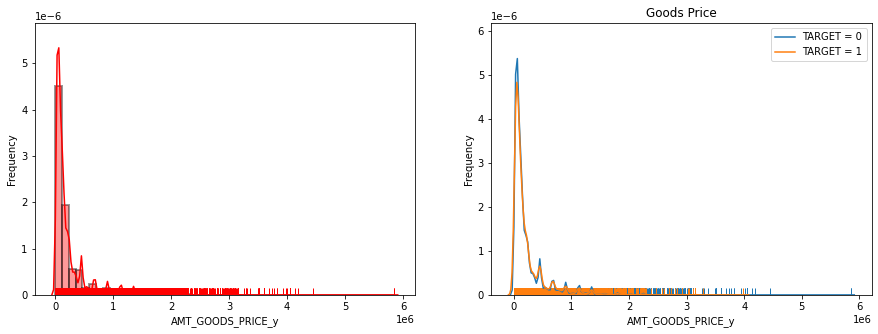

In [96]:
# 'AMT_GOODS_PRICE_y' variable
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(merged_data['AMT_GOODS_PRICE_y'], bins= 50, kde= True, rug = True, color = 'r', hist_kws=dict(edgecolor="k", linewidth=2))
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.distplot(target_0['AMT_GOODS_PRICE_y'], bins = 50, kde = True, rug= True, hist = False, label = 'TARGET = 0')
sns.distplot(target_1['AMT_GOODS_PRICE_y'], bins = 50, kde = True, rug = True, hist = False, label = 'TARGET = 1')
plt.ylabel("Frequency")
plt.title("Goods Price")
plt.legend()
plt.show()

#### Observation
- We can observe from above that in the previous application dataset goods price is concentrated around 10000.
- Both TARGET =0 and TARGET =1 have similar distribution except that the peak of TARGET =0 is higher at around 10000.

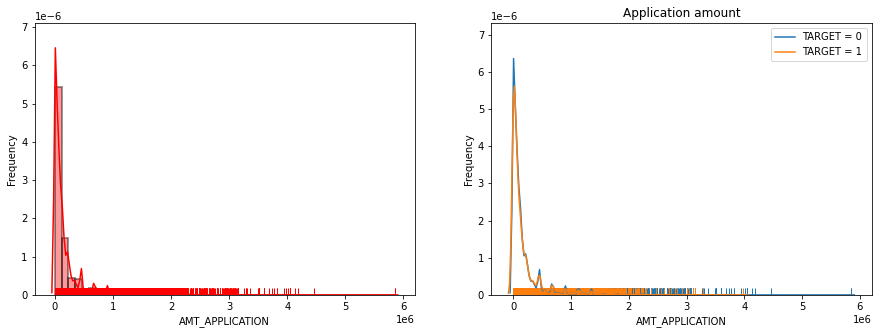

In [97]:
# 'AMT_APPLICATION' variable
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(merged_data['AMT_APPLICATION'], bins= 50, kde= True, rug = True, color = 'r', hist_kws=dict(edgecolor="k", linewidth=2))
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.distplot(target_0['AMT_APPLICATION'], bins = 50, kde = True, rug= True, hist = False, label = 'TARGET = 0')
sns.distplot(target_1['AMT_APPLICATION'], bins = 50, kde = True, rug = True, hist = False, label = 'TARGET = 1')
plt.ylabel("Frequency")
plt.title("Application amount")
plt.legend()
plt.show()

#### Observation
- We can observe that the amount asked by clients mostly lie at around 100000.
- Both TARGET =0 and TARGET =1 have similar distribution except that the peak of TARGET =0 is higher at around 10000.

#### Bivariate Analysis

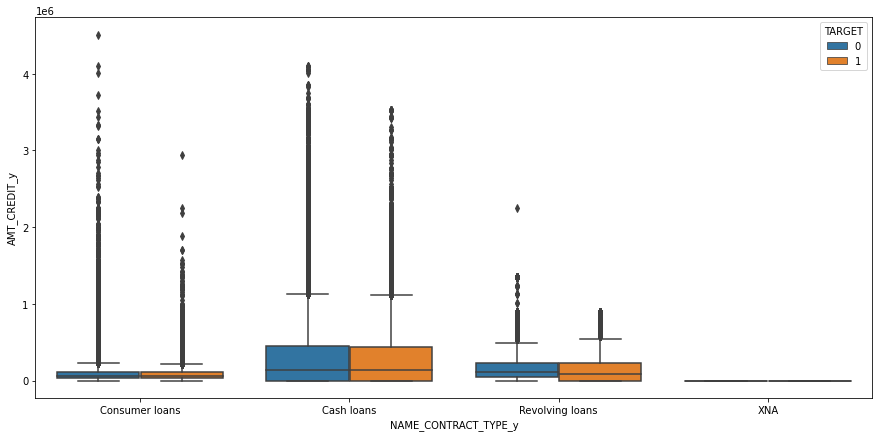

In [98]:
#plotting boxplot to analyze numerical-categorical variables
# BoxPlots for CODE_GENDER vs AMT_INCOME_TOTAL
plt.figure(figsize=[15,7])

sns.boxplot(data = merged_data, x='NAME_CONTRACT_TYPE_y', y= 'AMT_CREDIT_y', hue = "TARGET")
plt.show()

#### Observation
- Clients who opted for cash loans have higher credit amounts as compared to the other consumer and revolving loan types.
- All the three types of loans for both TARGET= 0 and TARGET= 1 have many outliers.

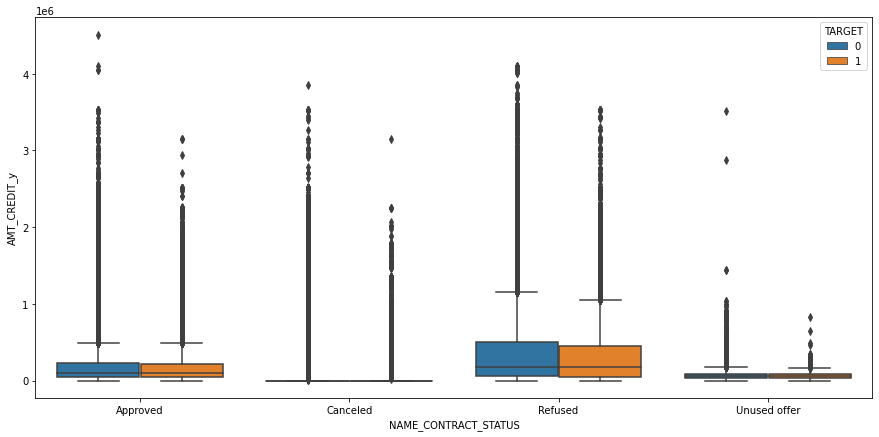

In [99]:
# BoxPlots for NAME_CONTRACT_STATUS vs AMT_CREDIT_y
plt.figure(figsize=[15,7])

sns.boxplot(data = merged_data, x='NAME_CONTRACT_STATUS', y= 'AMT_CREDIT_y', hue = "TARGET")
plt.show()

#### Observation 
- It is clearly observable by the range of IQR of the boxplot that some clients' loans were most likely refused due to high credit amounts demanded by them. 
- All the types for both TARGET= 0 and TARGET= 1 have many outliers.

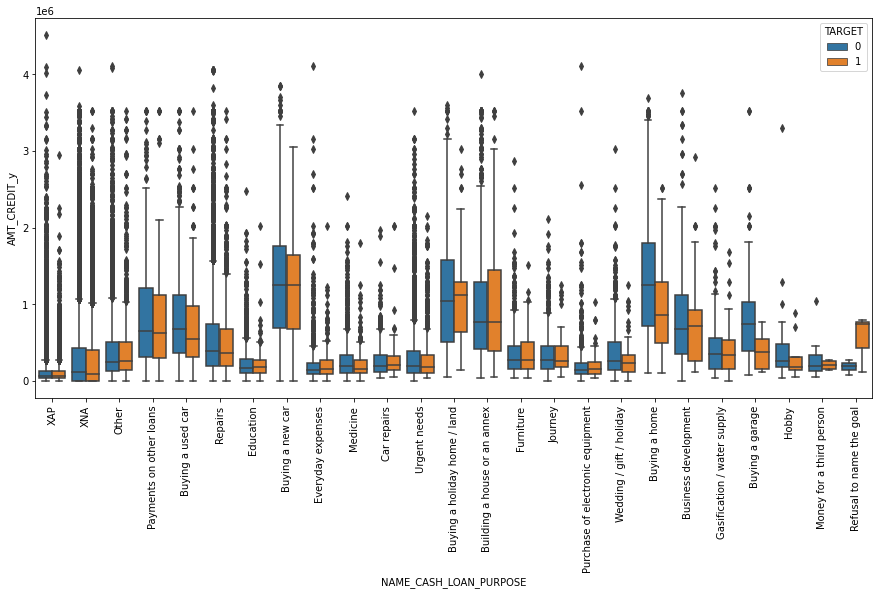

In [100]:
# BoxPlots for NAME_CASH_LOAN_PURPOSE vs AMT_CREDIT_y
plt.figure(figsize=[15,7])

sns.boxplot(data = merged_data, x='NAME_CASH_LOAN_PURPOSE', y= 'AMT_CREDIT_y', hue = "TARGET")
plt.xticks(rotation = 90)
plt.show()

#### Observation 
- It is clearly observable that credit amounts are higher for buying a car, buying a holiday home/land, buying a house or an annex and buying a home.
- All the types of cash loan purposes for both TARGET= 0 and TARGET= 1 have many outliers with some having extreme outliers.

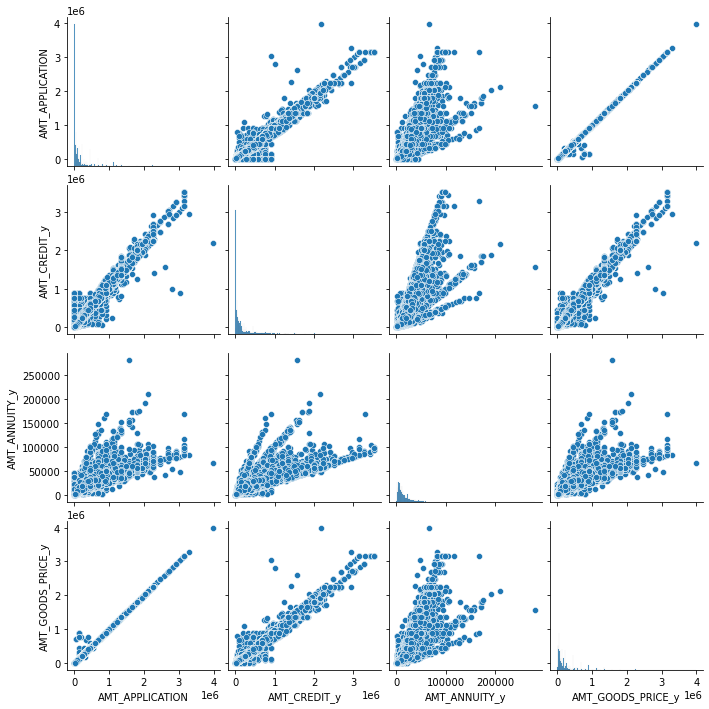

In [101]:
#Plotting pairplot for Target =1
pair = target_1[['AMT_APPLICATION','AMT_CREDIT_y', 'AMT_ANNUITY_y', 'AMT_GOODS_PRICE_y']]
sns.pairplot(pair)

plt.show()

#### Observation
- Goods amount and the application amount have highest correlation.
- Goods price and credit amount are highly correlated since the client opted for a loan which is equal to the price of those goods. 
- Credit amount and the application are highly correlated.
- Annuity ammount and Goods price amount also have a high correlation.

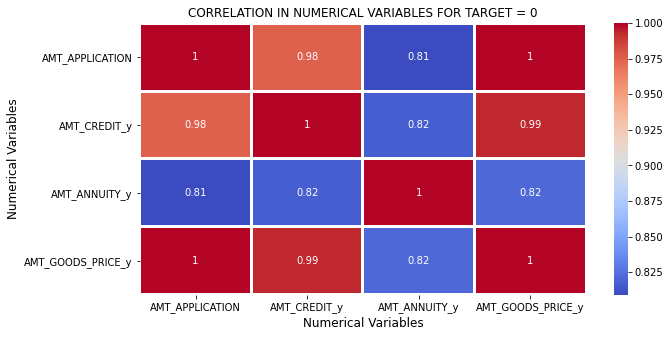

In [102]:
# plotting heatmap to visualize the correlation for TARGET = 0 
plt.figure(figsize = (10,5))

sns.heatmap(target_0[['AMT_APPLICATION','AMT_CREDIT_y', 'AMT_ANNUITY_y', 'AMT_GOODS_PRICE_y']].corr(),
            annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Numerical Variables", fontdict={"fontsize": 12})
plt.ylabel("Numerical Variables", fontdict={"fontsize": 12})
plt.title("CORRELATION IN NUMERICAL VARIABLES FOR TARGET = 0")
plt.show()

#### Observation
- Goods amount and the application amount have highest correlation.
- Goods price and credit amount are highly correlated since the client opted for a loan which is equal to the price of those goods. 
- Credit amount and the application are highly correlated.
- Annuity ammount and Goods price amount also have a high correlation.
- Annuity ammount and application amount also have a high correlation.

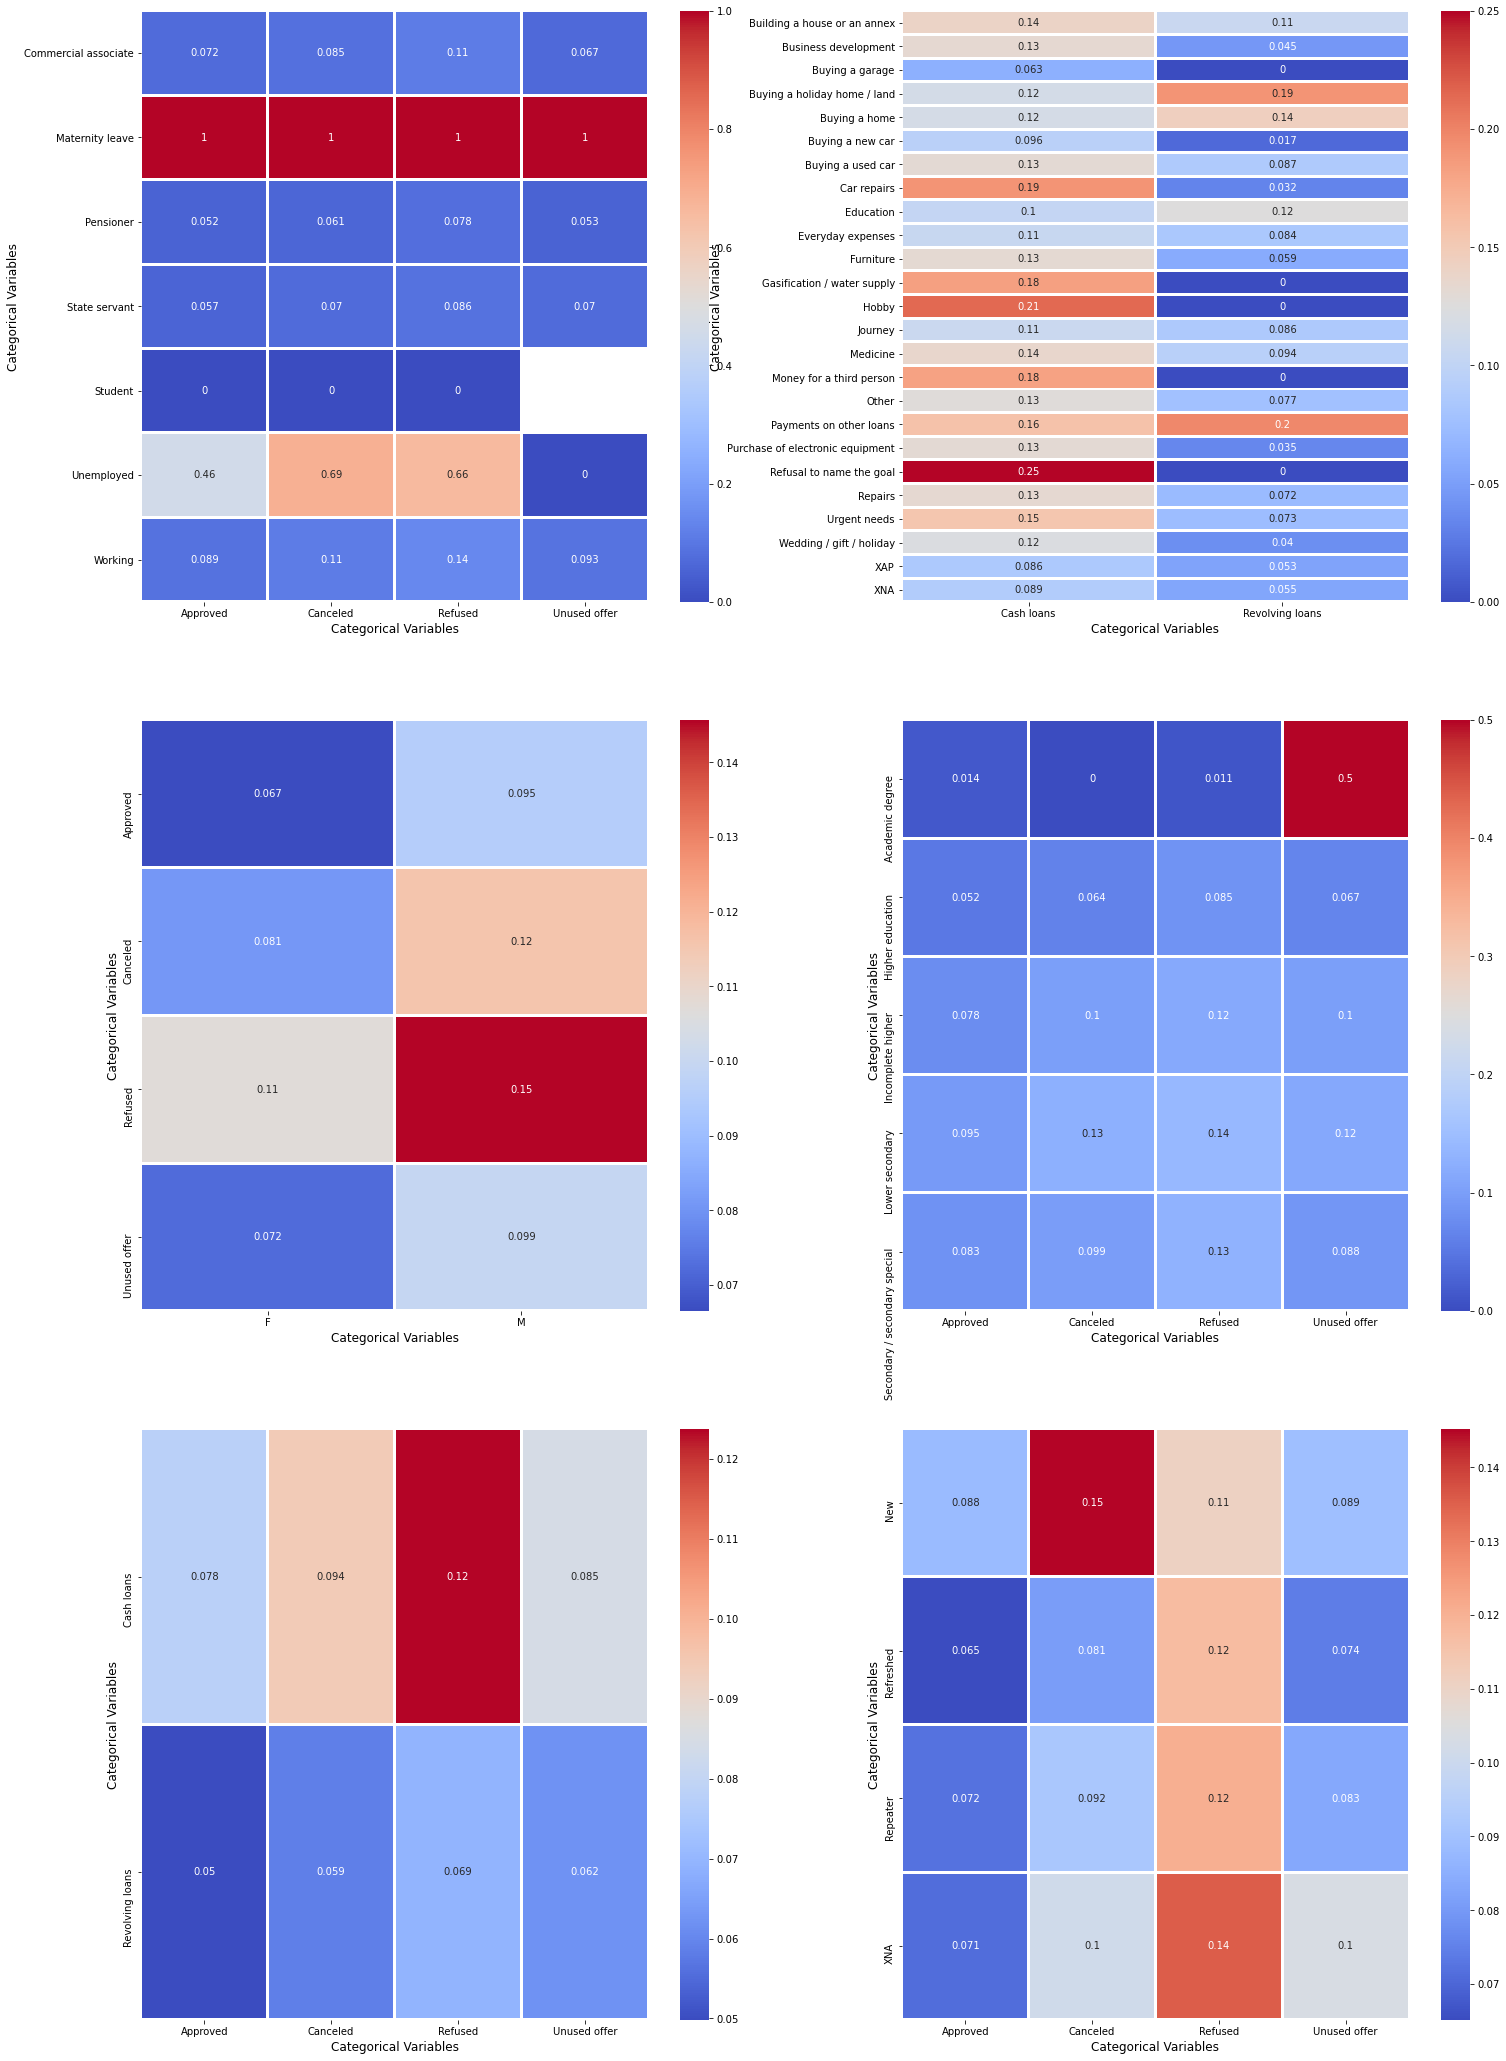

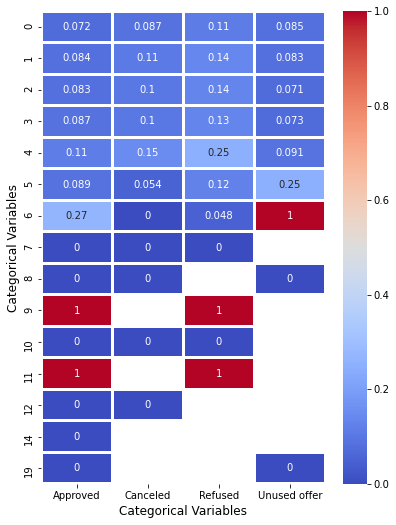

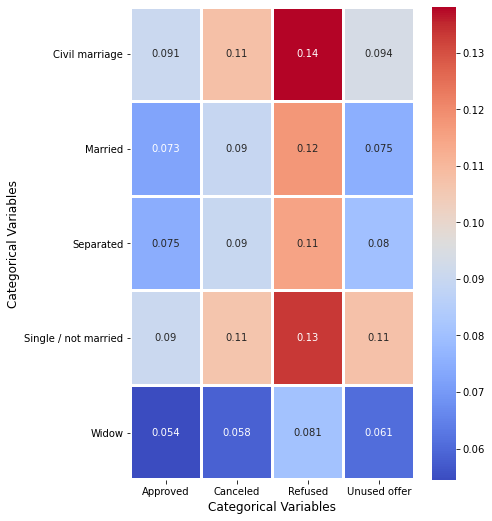

In [105]:
#plotting heatmap for correlation in categorical variables
plt.figure(figsize=(25,50))
plt.title("CORRELATION IN CATEGORICAL VARIABLES")

res = pd.pivot_table(data=merged_data, index="NAME_INCOME_TYPE", columns="NAME_CONTRACT_STATUS", values = "TARGET")

plt.subplot(4,2,1)
sns.heatmap(res, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Categorical Variables", fontdict={"fontsize": 12})
plt.ylabel("Categorical Variables", fontdict={"fontsize": 12})

res = pd.pivot_table(data=merged_data, index="NAME_CASH_LOAN_PURPOSE", columns="NAME_CONTRACT_TYPE_x", values = "TARGET")

plt.subplot(4,2,2)
sns.heatmap(res, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Categorical Variables", fontdict={"fontsize": 12})
plt.ylabel("Categorical Variables", fontdict={"fontsize": 12})

res = pd.pivot_table(data=merged_data, index="NAME_CONTRACT_STATUS", columns="CODE_GENDER", values = "TARGET")

plt.subplot(4,2,3)
sns.heatmap(res, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Categorical Variables", fontdict={"fontsize": 12})
plt.ylabel("Categorical Variables", fontdict={"fontsize": 12})

res = pd.pivot_table(data=merged_data, index="NAME_EDUCATION_TYPE", columns="NAME_CONTRACT_STATUS", values = "TARGET")

plt.subplot(4,2,4)
sns.heatmap(res, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Categorical Variables", fontdict={"fontsize": 12})
plt.ylabel("Categorical Variables", fontdict={"fontsize": 12})

res = pd.pivot_table(data=merged_data, index="NAME_CONTRACT_TYPE_x", columns="NAME_CONTRACT_STATUS", values = "TARGET")

plt.subplot(4,2,5)
sns.heatmap(res, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Categorical Variables", fontdict={"fontsize": 12})
plt.ylabel("Categorical Variables", fontdict={"fontsize": 12})

res = pd.pivot_table(data=merged_data, index="NAME_CLIENT_TYPE", columns="NAME_CONTRACT_STATUS", values = "TARGET")

plt.subplot(4,2,6)
sns.heatmap(res, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Categorical Variables", fontdict={"fontsize": 12})
plt.ylabel("Categorical Variables", fontdict={"fontsize": 12})
plt.show()

plt.figure(figsize=(14,40))
res = pd.pivot_table(data=merged_data, index="CNT_CHILDREN", columns="NAME_CONTRACT_STATUS", values = "TARGET")

plt.subplot(4,2,7)
sns.heatmap(res, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Categorical Variables", fontdict={"fontsize": 12})
plt.ylabel("Categorical Variables", fontdict={"fontsize": 12})
plt.show()

plt.figure(figsize=(14,40))
res = pd.pivot_table(data=merged_data, index="NAME_FAMILY_STATUS", columns="NAME_CONTRACT_STATUS", values = "TARGET")

plt.subplot(4,2,8)
sns.heatmap(res, annot= True, cmap= "coolwarm", linewidths=2)
plt.xlabel("Categorical Variables", fontdict={"fontsize": 12})
plt.ylabel("Categorical Variables", fontdict={"fontsize": 12})
plt.show()

#### Observation
- Clients who are on maternity leave are more likely to default irrespective of Contract status.

- Clients who opted for cash loans and refused to share their goal for loans have highest default rate, and clients who opted for cash loans for car repairs, gasification/ water supply, money for a third person are more likely to default.
- Clients who opted for payments on other loans and buying a holiday home/land are more likely to default on revolving loans.

- Male clients whose of contract status is refused are more likely to default.

- Clients who have an academic degree with contract status as unused offer are more likely to default.

- Clients who opted for cash loans with contract status as unused offer have highest default rate.

- New clients having contract status as 'Cancelled' are more likely to default.
- In general clients whose contract status is refused are more likely to default.

- Clients who are single/not married with contract status being refused are most likely to default.
- Clients whose contract status is Refused are more likely to default irrespective of their family status.

- Clients having 6 children and unused offer are most likely to default.
- Clients with 9 or 11 children with either approved or refused loan offer have the highest default rate.
- In general, clients having more number of children are more likely to default irespective of contract status.

## Conclusions

#### Insights and recommendations:

##### Clients to avoid (_most likely to default_):

1 In general clients who are on maternity leave are most likely to default.

2 In general clients who are unemployed are most likely to default.

3 Male clients who are unemployed/ have opted for Cash loans/ have contract status as refused are more likely to default.

4 Clients who have lower-secondary education/ have undergone civil marriage/ are single are more likely to default.

5 In general clients who have relatively more number of children are more likely to default.

6 Male Clients who are realty agents/ low-skilled labourers are more likely to default.


##### Clients to seek (not likely to default):

1 Clients who have opted for Revolving loans are less likely to default.

2 In general accountants are less likely to default.

3 Clients who are businessmen or students are least likely to default.

4 In general clients with contract status as 'Approved' are less likely to default.

5 In general clients with an academic degree are less likely to default.

6 In general clients who are widiws are less likely to default.